In [2]:
# import numpy as np
# import os

# def compute_dataset_statistics(images_dir, clip_value=30.0):
#     # List all .npy image files
#     image_files = [f for f in os.listdir(images_dir) if f.endswith('.npy')]
    
#     # Initialize a list to collect pixel values
#     all_pixels = []
    
#     for file in image_files:
#         img = np.load(os.path.join(images_dir, file))
#         # Apply clipping similar to your clip_and_normalize_SUVimage
#         img = np.clip(img, 0.0, clip_value)
#         # Flatten and store pixel values
#         all_pixels.append(img.ravel())
    
#     # Concatenate all pixels from all images
#     all_pixels = np.concatenate(all_pixels)
#     mu = np.mean(all_pixels)
#     std = np.std(all_pixels)
#     return mu, std

# # Example usage:
# images_dir = os.path.join(os.getcwd(), "images")
# mu, std = compute_dataset_statistics(images_dir)
# print("Dataset mean (μ):", mu)
# print("Dataset standard deviation (σ):", std)


In [ ]:
# import os
# import numpy as np

# def get_bbox(img):
#     rows = np.any(img, axis=1)
#     cols = np.any(img, axis=0)
#     rmin, rmax = np.where(rows)[0][[0, -1]]
#     cmin, cmax = np.where(cols)[0][[0, -1]]
#     return img[rmin:rmax, cmin:cmax]

# def pad2square_center(image, size):
#     # Create a square canvas of zeros
#     out = np.zeros((size, size))
#     h, w = image.shape
#     # Compute starting positions to center the image
#     start_h = (size - h) // 2
#     start_w = (size - w) // 2
#     out[start_h:start_h+h, start_w:start_w+w] = image
#     return out

# def process_image(file_path, image_size):
#     """
#     Loads an image from file, applies cropping to its bounding box,
#     centers it on a square canvas of given size, and clips pixel values.
#     """
#     # Load the image
#     img = np.load(file_path)
    
#     # Optionally, if the image needs reshaping, you could do so here.
#     # For now we assume each .npy file is already a 2D array.
    
#     # Crop to the bounding box of non-zero values
#     img = get_bbox(img)
    
#     # Pad the image to a square of target size
#     img = pad2square_center(img, image_size)
    
#     # Clip pixel intensities to the range [0, 30]
#     img = np.clip(img, 0.0, 30.0)
#     return img

# def compute_dataset_statistics_from_directory(images_dir, image_size):
#     """
#     Recursively searches the given directory for .npy files,
#     processes each image, and computes the overall mean and
#     standard deviation of the pixel values.
#     """
#     # Recursively list all .npy files
#     image_files = []
#     for root, _, files in os.walk(images_dir):
#         for file in files:
#             if file.endswith('.npy'):
#                 image_files.append(os.path.join(root, file))
    
#     if not image_files:
#         raise ValueError("No .npy image files found in the specified directory.")
    
#     all_pixels = []
#     for file_path in image_files:
#         try:
#             processed_img = process_image(file_path, image_size)
#             all_pixels.append(processed_img.ravel())
#         except Exception as e:
#             print(f"Error processing file {file_path}: {e}")
    
#     if not all_pixels:
#         raise ValueError("No images were processed successfully; cannot compute statistics.")
    
#     all_pixels = np.concatenate(all_pixels)
#     mu = np.mean(all_pixels)
#     std = np.std(all_pixels)
#     return mu, std

# # Example usage:
# images_dir = "/home/mezher/Documents/Deauville_DeepLearning/splitting/images/"  # Adjust as needed.
# image_size = 310  # Must match your pipeline.
# mu, std = compute_dataset_statistics_from_directory(images_dir, image_size)
# print("Dataset mean (μ):", mu)
# print("Dataset standard deviation (σ):", std)


Dataset mean (μ): 0.6088192332631431
Dataset standard deviation (σ): 1.853717194431166


In [4]:
import os
import numpy as np
import pandas as pd

# These are your previously defined helper functions.
def get_bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return img[rmin:rmax, cmin:cmax]

def pad2square_center(image, size):
    out = np.zeros((size, size))
    h, w = image.shape
    start_h = (size - h) // 2
    start_w = (size - w) // 2
    out[start_h:start_h+h, start_w:start_w+w] = image
    return out

def process_image(file_path, image_size):
    """
    Loads an image from file, applies cropping to its bounding box,
    centers it on a square canvas of given size, and clips pixel values.
    """
    img = np.load(file_path)
    img = get_bbox(img)
    img = pad2square_center(img, image_size)
    img = np.clip(img, 0.0, 30.0)
    return img

def compute_dataset_statistics_from_csv(csv_path, images_dir, image_size):
    """
    Loads the CSV file (which contains the filtered list of images),
    processes each image found in the 'filename' column, and computes
    the overall mean and standard deviation of the pixel values.
    """
    # Load the CSV that was created after filtering (data_resplit.csv)
    df = pd.read_csv(csv_path)
    
    # Get the unique image filenames from the CSV.
    # Assumes that the CSV 'filename' column contains relative paths.
    file_paths = [os.path.join(images_dir, fname) for fname in df['filename'].unique()]
    
    if not file_paths:
        raise ValueError("No image files found in the CSV.")
    
    all_pixels = []
    for file_path in file_paths:
        try:
            processed_img = process_image(file_path, image_size)
            all_pixels.append(processed_img.ravel())
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")
    
    if not all_pixels:
        raise ValueError("No images were processed successfully; cannot compute statistics.")
    
    all_pixels = np.concatenate(all_pixels)
    mu = np.mean(all_pixels)
    std = np.std(all_pixels)
    return mu, std

# Example usage:
csv_file = "data_resplit.csv"  # Your CSV containing the filtered dataset
images_dir = "/home/mezher/Documents/Deauville_DeepLearning/splitting/"
image_size = 310  # Must match the rest of your pipeline

mu, std = compute_dataset_statistics_from_csv(csv_file, images_dir, image_size)
print("Dataset mean (μ):", mu)
print("Dataset standard deviation (σ):", std)


Dataset mean (μ): 0.60872803532279
Dataset standard deviation (σ): 1.8565245436133435


=== Distribution for split0 ===
Train target distribution:
target
0    0.777362
1    0.222638
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.767347
1    0.232653
Name: proportion, dtype: float64




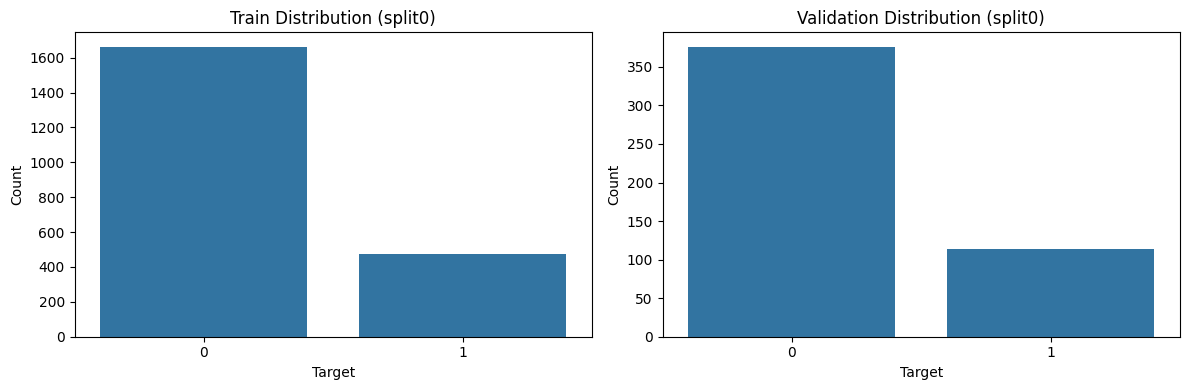

=== Distribution for split1 ===
Train target distribution:
target
0    0.780873
1    0.219127
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.751055
1    0.248945
Name: proportion, dtype: float64




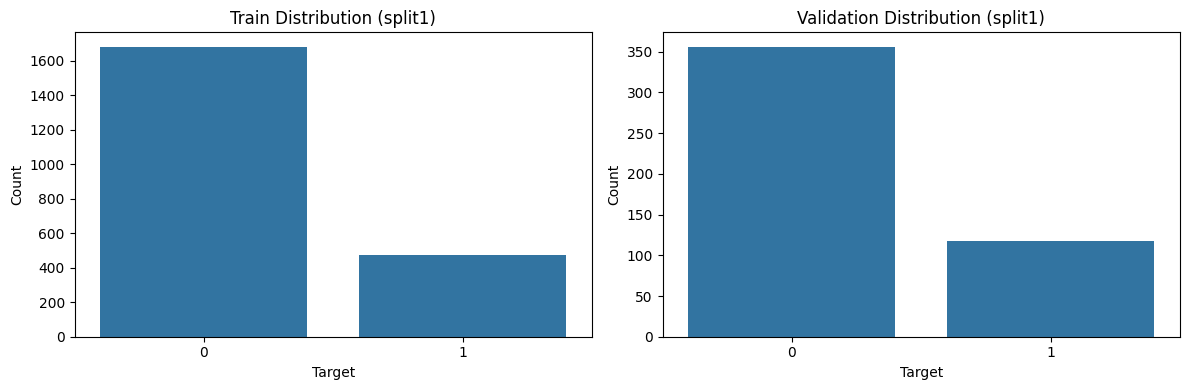

=== Distribution for split2 ===
Train target distribution:
target
0    0.774163
1    0.225837
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.780669
1    0.219331
Name: proportion, dtype: float64




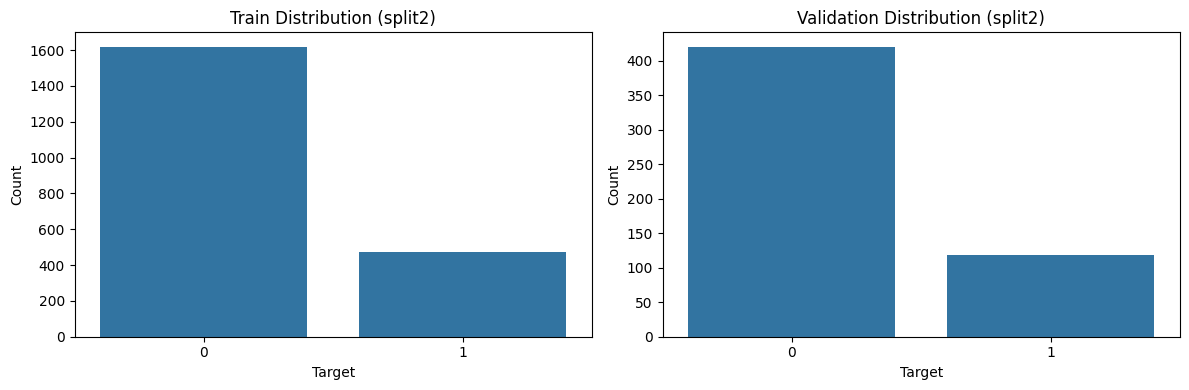

=== Distribution for split3 ===
Train target distribution:
target
0    0.772472
1    0.227528
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.788618
1    0.211382
Name: proportion, dtype: float64




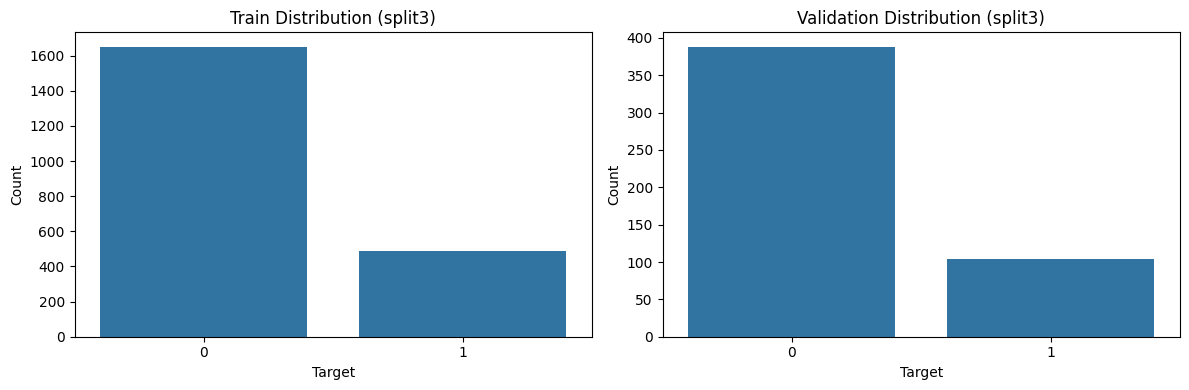

=== Distribution for split4 ===
Train target distribution:
target
0    0.773371
1    0.226629
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.784314
1    0.215686
Name: proportion, dtype: float64




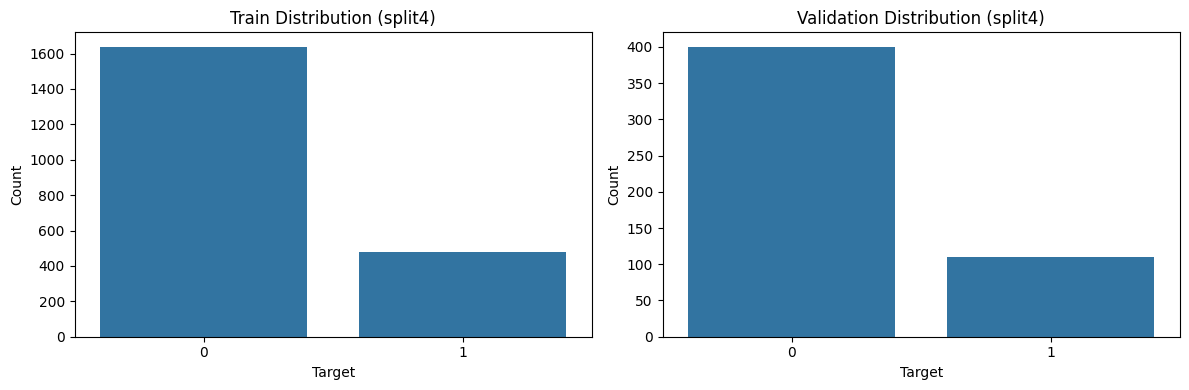

=== Distribution for split5 ===
Train target distribution:
target
0    0.779093
1    0.220907
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.763333
1    0.236667
Name: proportion, dtype: float64




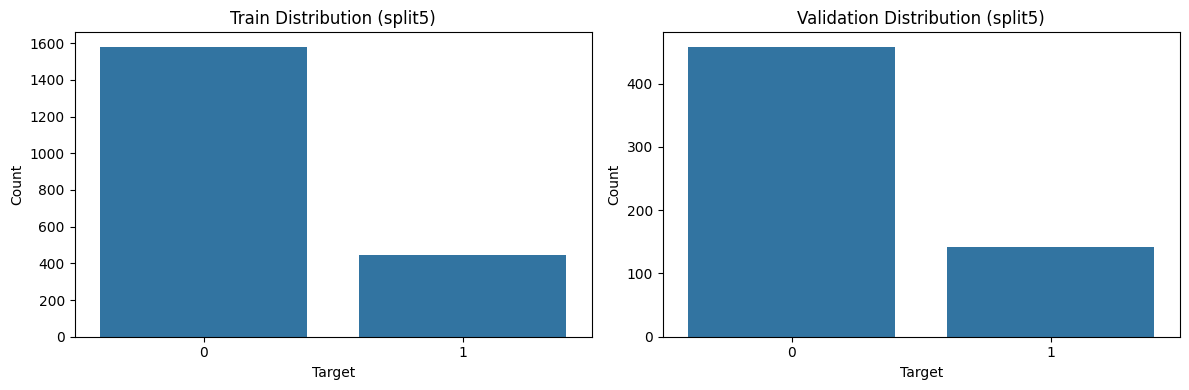

=== Distribution for split6 ===
Train target distribution:
target
0    0.776606
1    0.223394
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.771218
1    0.228782
Name: proportion, dtype: float64




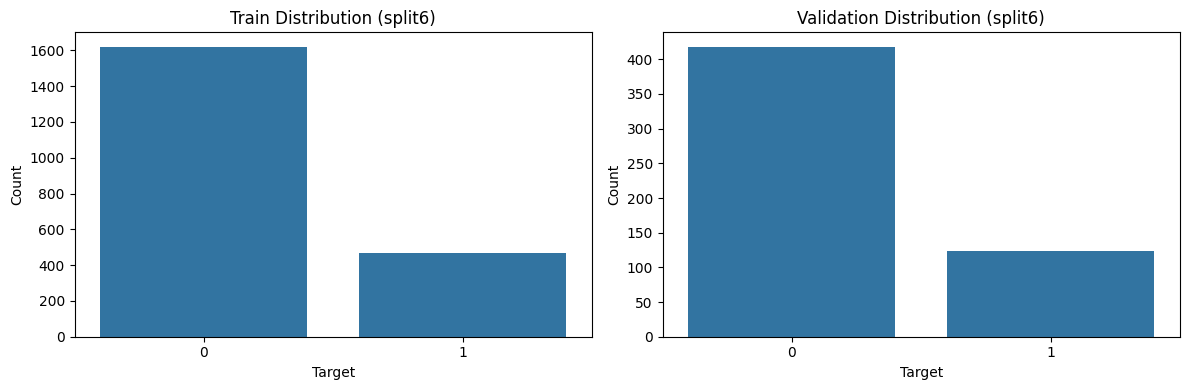

=== Distribution for split7 ===
Train target distribution:
target
0    0.785444
1    0.214556
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.734375
1    0.265625
Name: proportion, dtype: float64




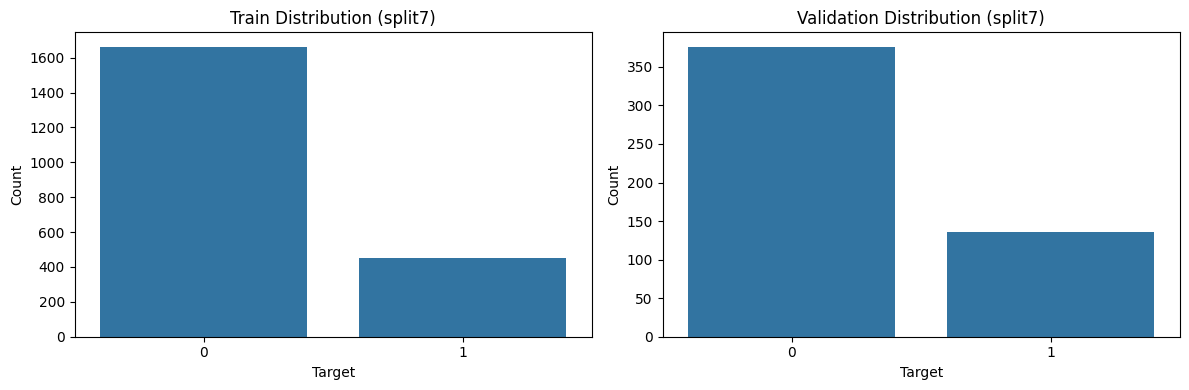

=== Distribution for split8 ===
Train target distribution:
target
0    0.784689
1    0.215311
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.739777
1    0.260223
Name: proportion, dtype: float64




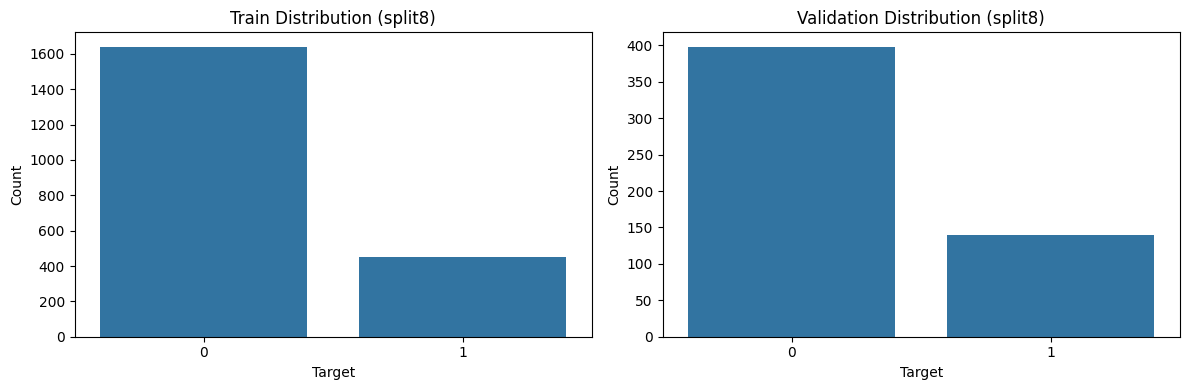

=== Distribution for split9 ===
Train target distribution:
target
0    0.7718
1    0.2282
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.792373
1    0.207627
Name: proportion, dtype: float64




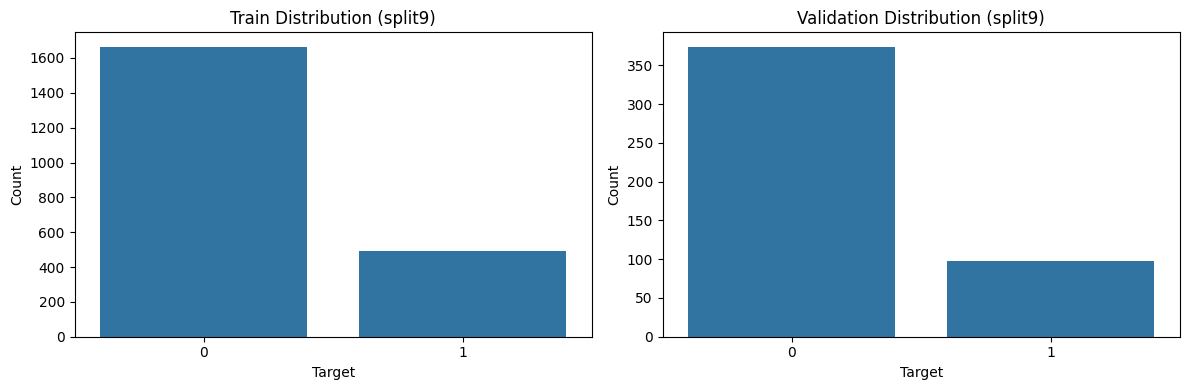

=== Distribution for split10 ===
Train target distribution:
target
0    0.77757
1    0.22243
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.766393
1    0.233607
Name: proportion, dtype: float64




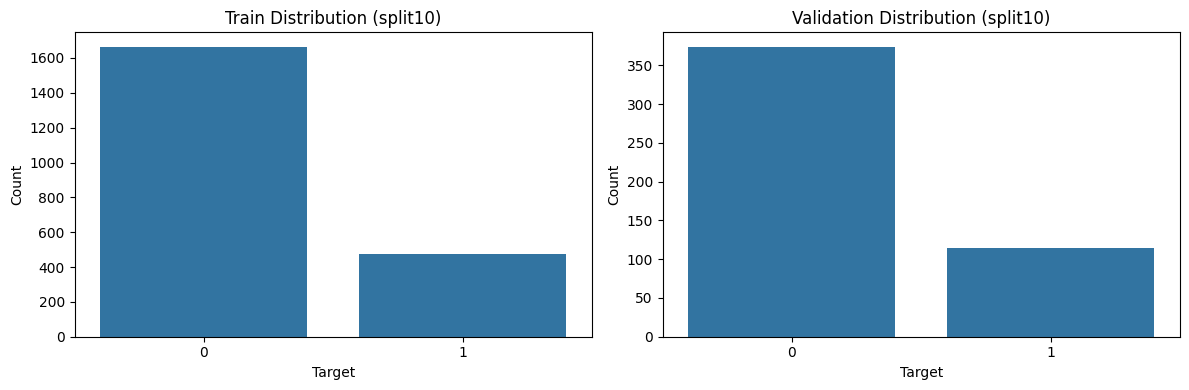

=== Distribution for split11 ===
Train target distribution:
target
0    0.771896
1    0.228104
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.789091
1    0.210909
Name: proportion, dtype: float64




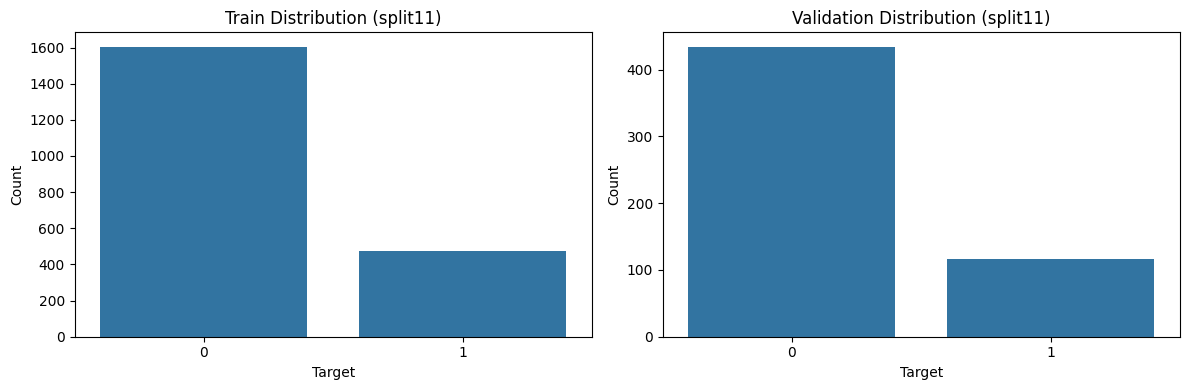

=== Distribution for split12 ===
Train target distribution:
target
0    0.771593
1    0.228407
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.790441
1    0.209559
Name: proportion, dtype: float64




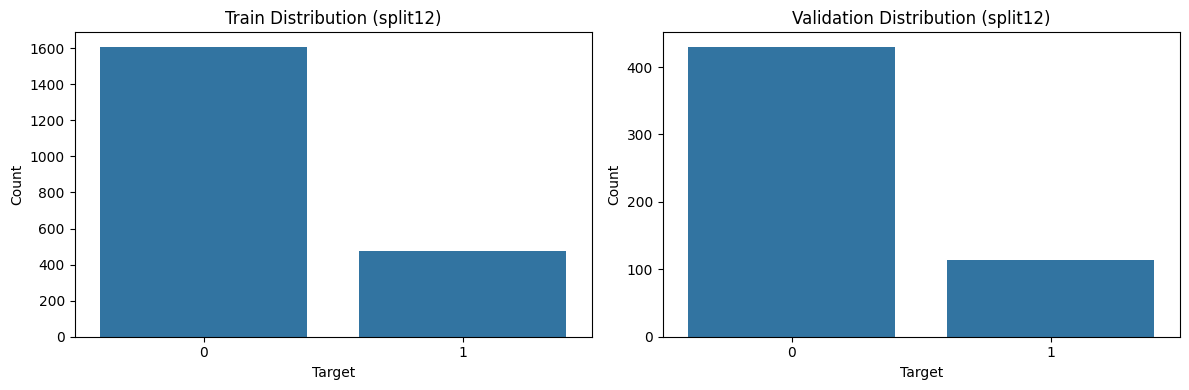

=== Distribution for split13 ===
Train target distribution:
target
0    0.774859
1    0.225141
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.778226
1    0.221774
Name: proportion, dtype: float64




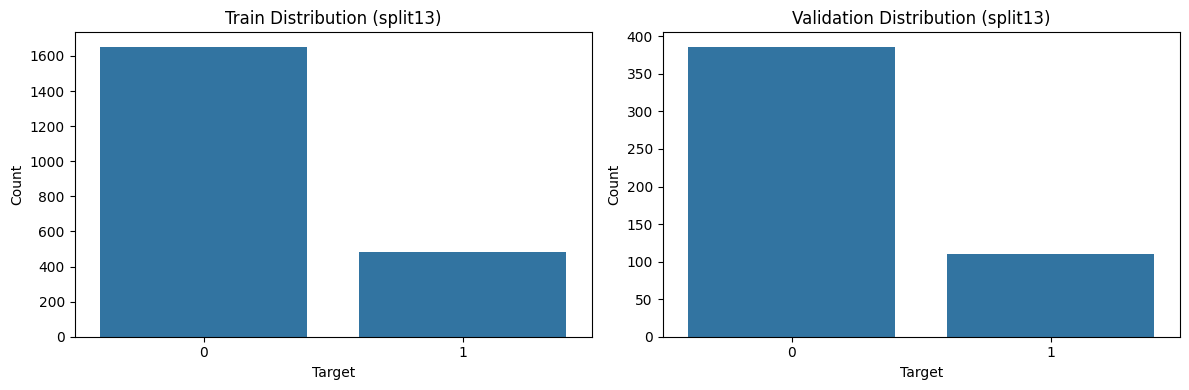

=== Distribution for split14 ===
Train target distribution:
target
0    0.786538
1    0.213462
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.733577
1    0.266423
Name: proportion, dtype: float64




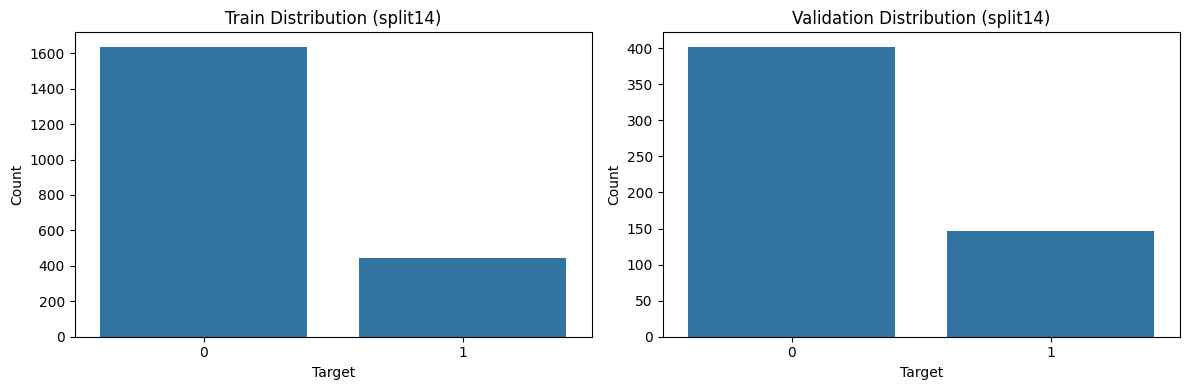

=== Distribution for split15 ===
Train target distribution:
target
0    0.770554
1    0.229446
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.794776
1    0.205224
Name: proportion, dtype: float64




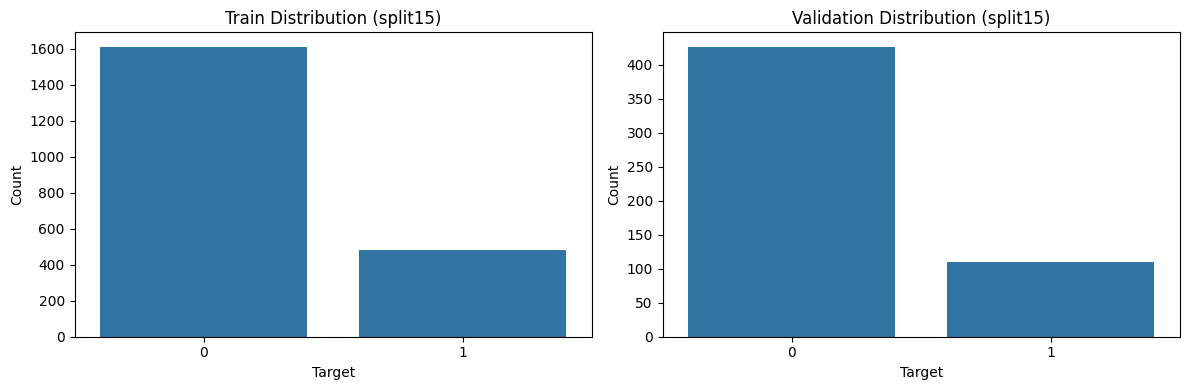

=== Distribution for split16 ===
Train target distribution:
target
0    0.778958
1    0.221042
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.76259
1    0.23741
Name: proportion, dtype: float64




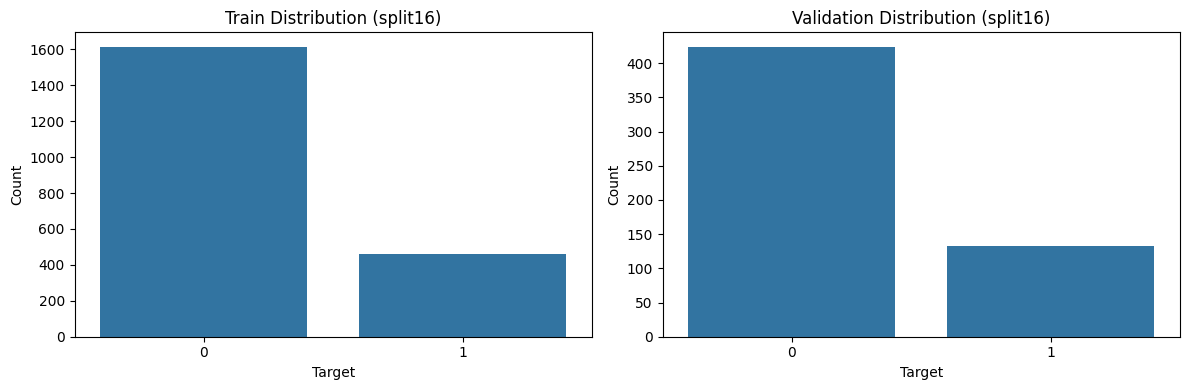

=== Distribution for split17 ===
Train target distribution:
target
0    0.789425
1    0.210575
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.711864
1    0.288136
Name: proportion, dtype: float64




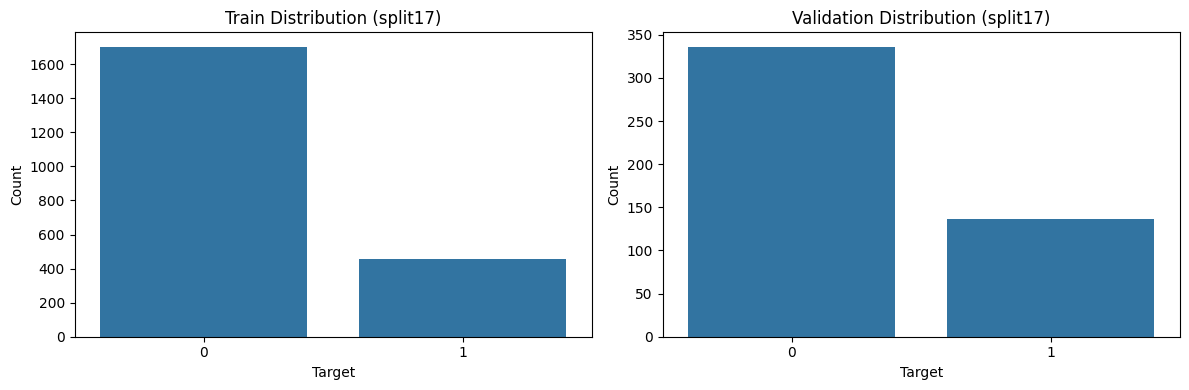

=== Distribution for split18 ===
Train target distribution:
target
0    0.780115
1    0.219885
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.757463
1    0.242537
Name: proportion, dtype: float64




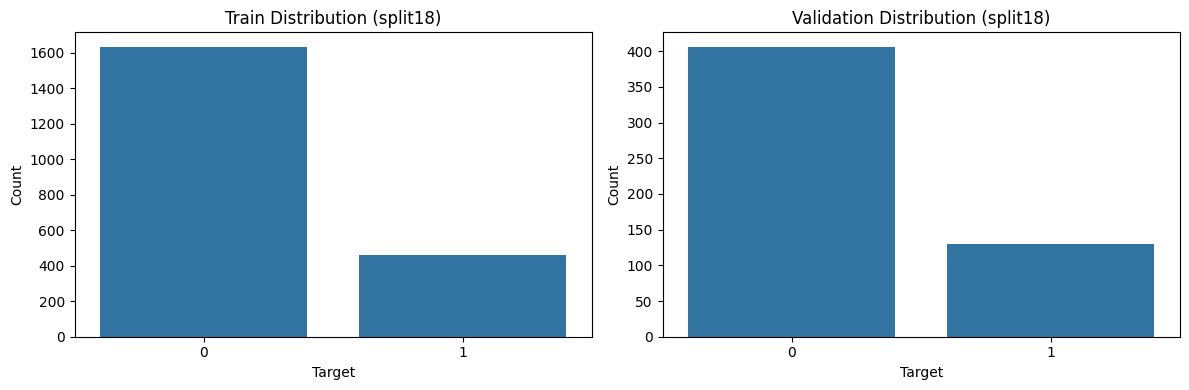

=== Distribution for split19 ===
Train target distribution:
target
0    0.775248
1    0.224752
Name: proportion, dtype: float64

Validation target distribution:
target
0    0.776316
1    0.223684
Name: proportion, dtype: float64




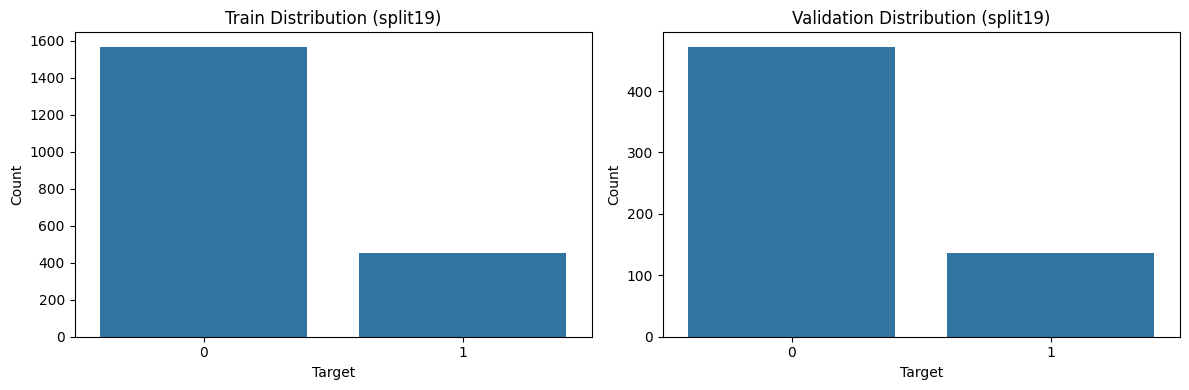

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = "/home/mezher/Documents/Deauville_DeepLearning/splitting/data_resplit.csv"
df_csv = pd.read_csv(csv_path)

# Define the list of bootstrap split columns
split_columns = [f"split{i}" for i in range(20)]

# Loop over each bootstrap split and compare target distributions for train vs. val
for split_col in split_columns:
    print(f"=== Distribution for {split_col} ===")
    
    # Filter DataFrame for train and validation groups based on current split
    train_df = df_csv[df_csv[split_col] == 'train']
    val_df = df_csv[df_csv[split_col] == 'val']
    
    # Calculate and print normalized target distributions
    print("Train target distribution:")
    print(train_df["target"].value_counts(normalize=True))
    print("\nValidation target distribution:")
    print(val_df["target"].value_counts(normalize=True))
    print("\n" + "="*50 + "\n")
    
    # Create side-by-side countplots for a visual comparison
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.countplot(ax=axes[0], x="target", data=train_df)
    axes[0].set_title(f"Train Distribution ({split_col})")
    axes[0].set_xlabel("Target")
    axes[0].set_ylabel("Count")
    
    sns.countplot(ax=axes[1], x="target", data=val_df)
    axes[1].set_title(f"Validation Distribution ({split_col})")
    axes[1].set_xlabel("Target")
    axes[1].set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()


=== Covariate distributions for split0 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.591207
F    0.408793
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.607843
F    0.392157
Name: proportion, dtype: float64


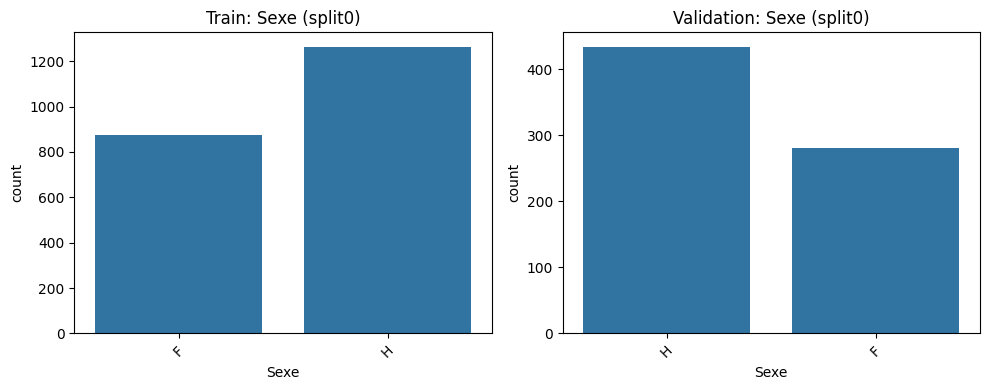


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.605239
3    0.211413
2    0.183349
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.577031
3    0.260504
2    0.162465
Name: proportion, dtype: float64


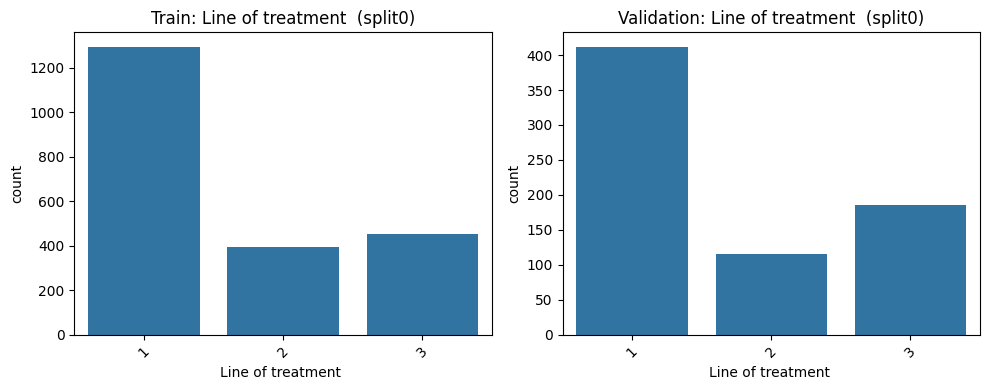


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.724041
10    0.275959
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.607843
10    0.392157
Name: proportion, dtype: float64


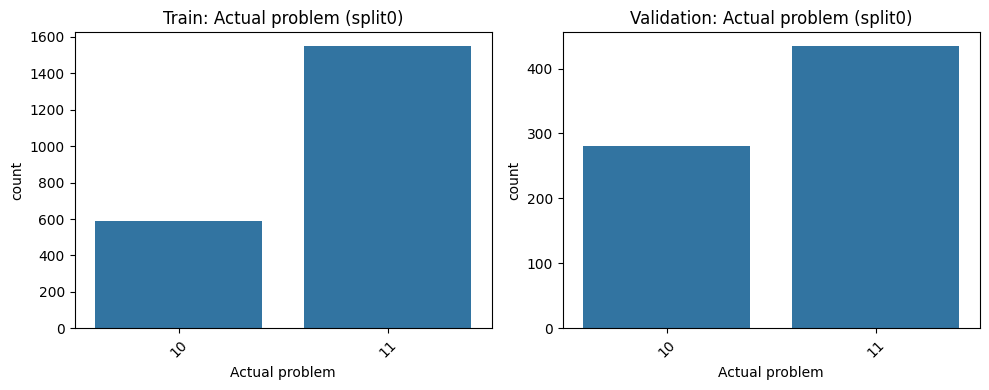



=== Covariate distributions for split1 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.592094
F    0.407906
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.611814
F    0.388186
Name: proportion, dtype: float64


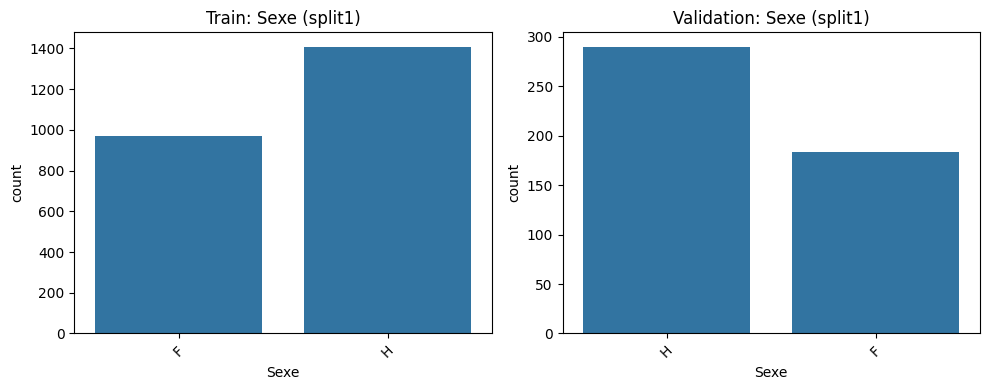


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.590412
3    0.228764
2    0.180824
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.637131
3    0.198312
2    0.164557
Name: proportion, dtype: float64


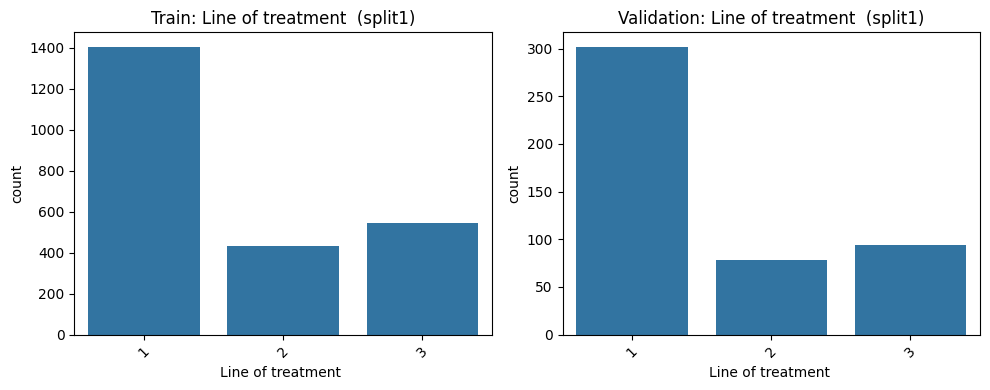


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.695542
10    0.304458
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.691983
10    0.308017
Name: proportion, dtype: float64


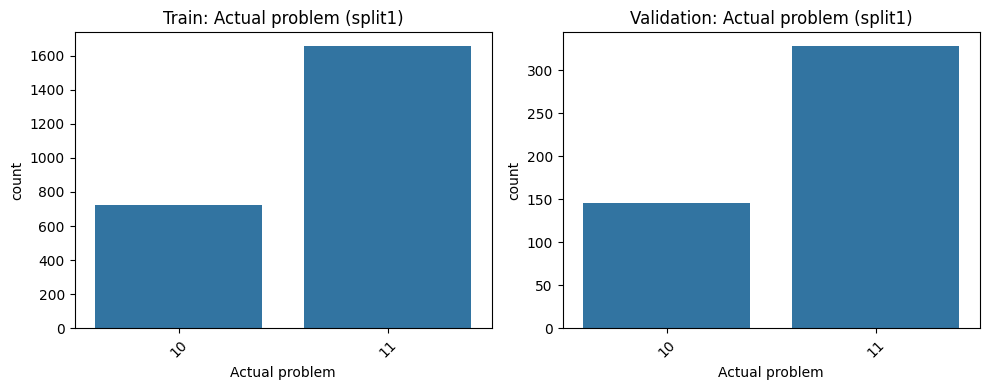



=== Covariate distributions for split2 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.590598
F    0.409402
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.617188
F    0.382812
Name: proportion, dtype: float64


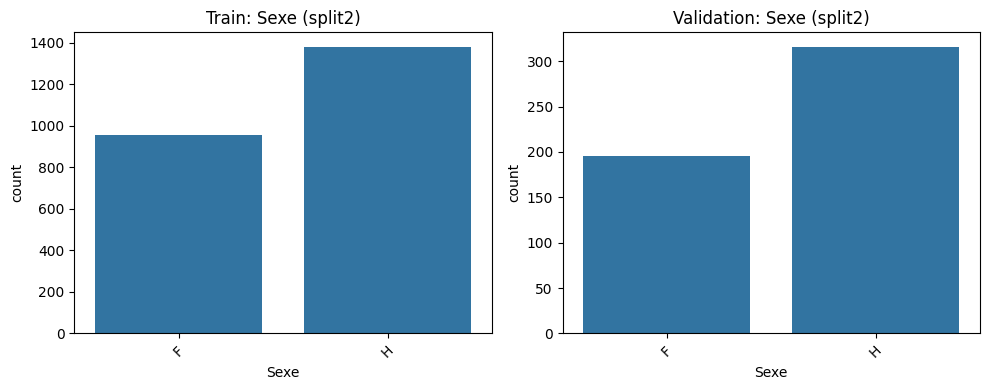


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.597436
3    0.227350
2    0.175214
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.601562
3    0.207031
2    0.191406
Name: proportion, dtype: float64


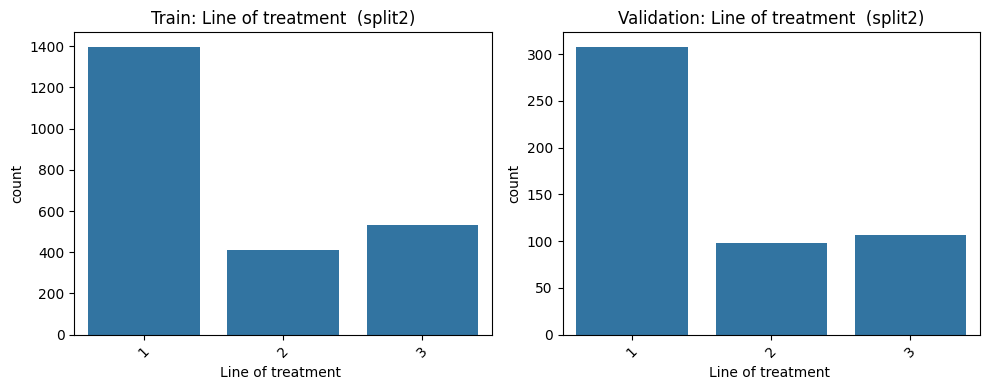


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.690598
10    0.309402
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.714844
10    0.285156
Name: proportion, dtype: float64


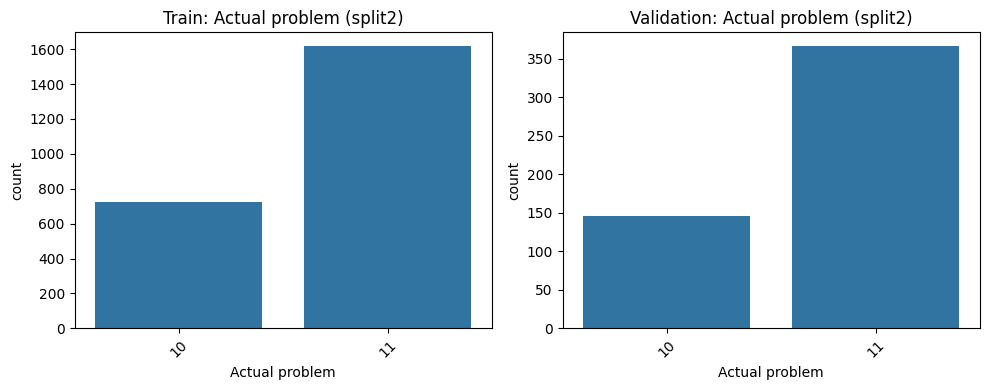



=== Covariate distributions for split3 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.601611
F    0.398389
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.572816
F    0.427184
Name: proportion, dtype: float64


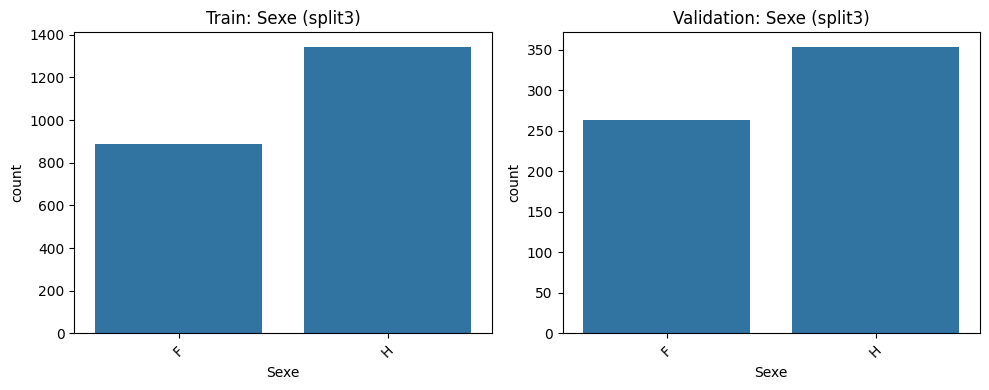


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.598926
3    0.214861
2    0.186213
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.595469
3    0.255663
2    0.148867
Name: proportion, dtype: float64


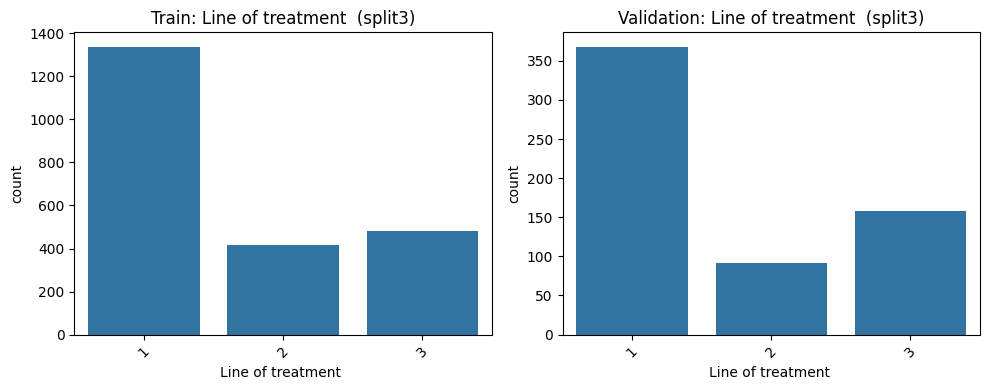


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.707252
10    0.292748
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.650485
10    0.349515
Name: proportion, dtype: float64


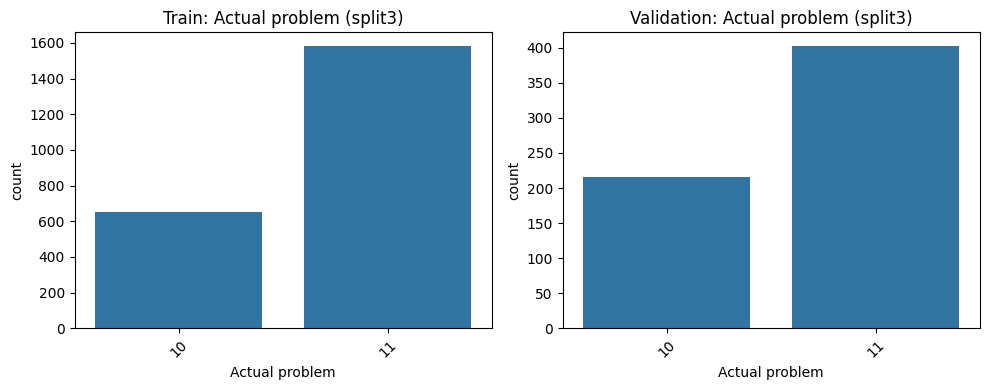



=== Covariate distributions for split4 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.614896
F    0.385104
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.529231
F    0.470769
Name: proportion, dtype: float64


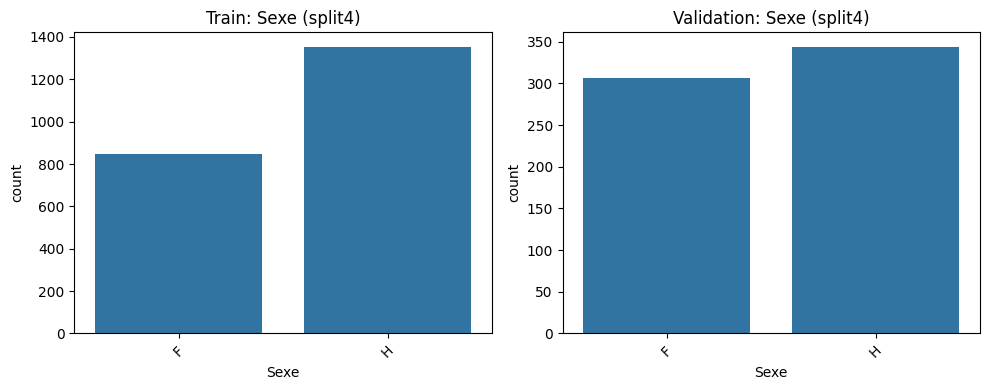


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.625795
3    0.201635
2    0.172570
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.504615
3    0.298462
2    0.196923
Name: proportion, dtype: float64


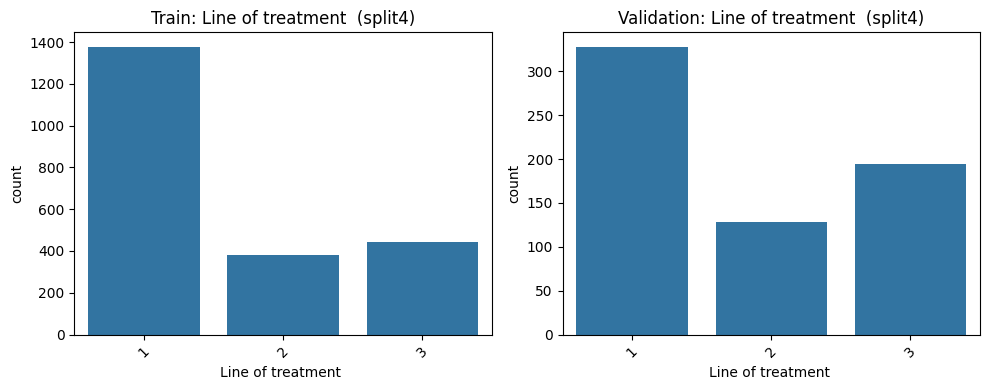


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.698456
10    0.301544
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.683077
10    0.316923
Name: proportion, dtype: float64


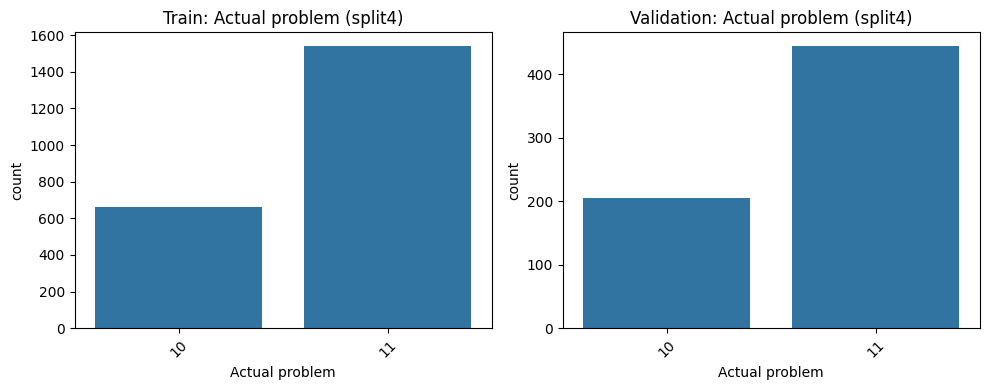



=== Covariate distributions for split5 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.59015
F    0.40985
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.615917
F    0.384083
Name: proportion, dtype: float64


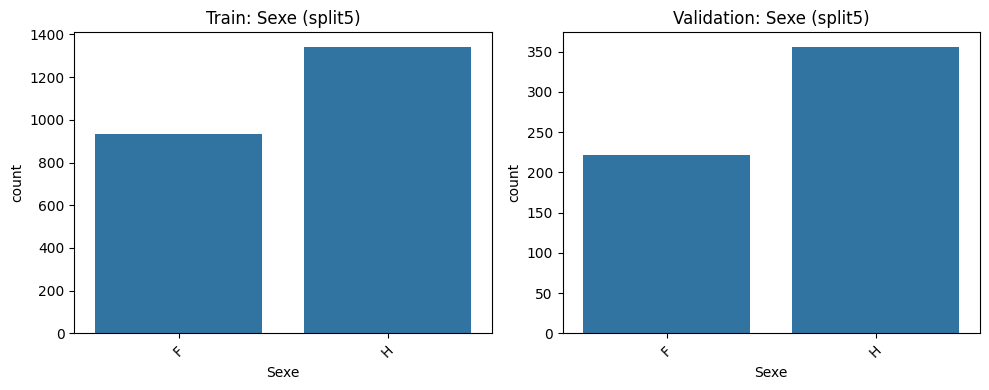


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.610378
3    0.217238
2    0.172383
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.550173
3    0.249135
2    0.200692
Name: proportion, dtype: float64


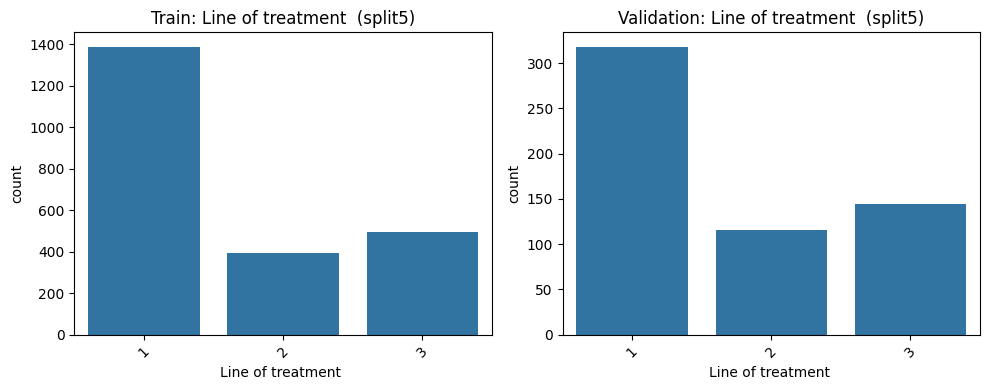


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.701847
10    0.298153
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.66782
10    0.33218
Name: proportion, dtype: float64


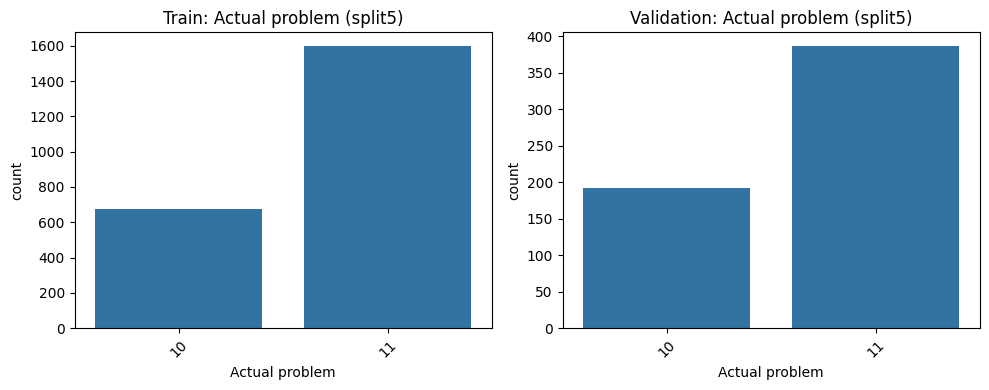



=== Covariate distributions for split6 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.592943
F    0.407057
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.606061
F    0.393939
Name: proportion, dtype: float64


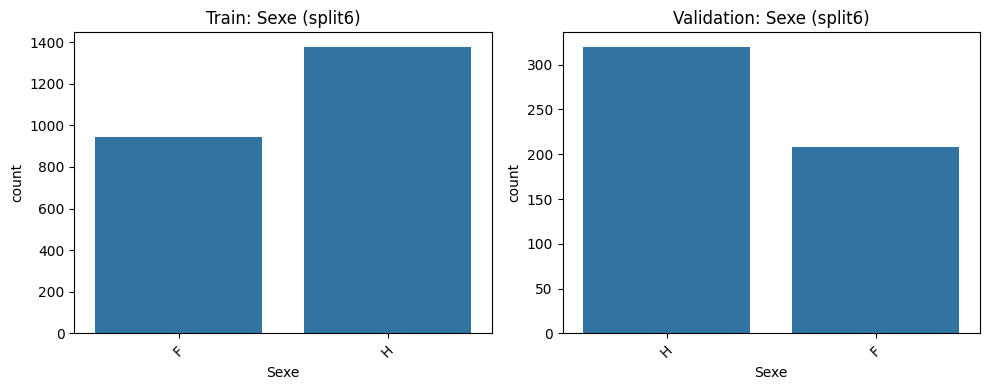


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.594664
3    0.226334
2    0.179002
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.613636
3    0.212121
2    0.174242
Name: proportion, dtype: float64


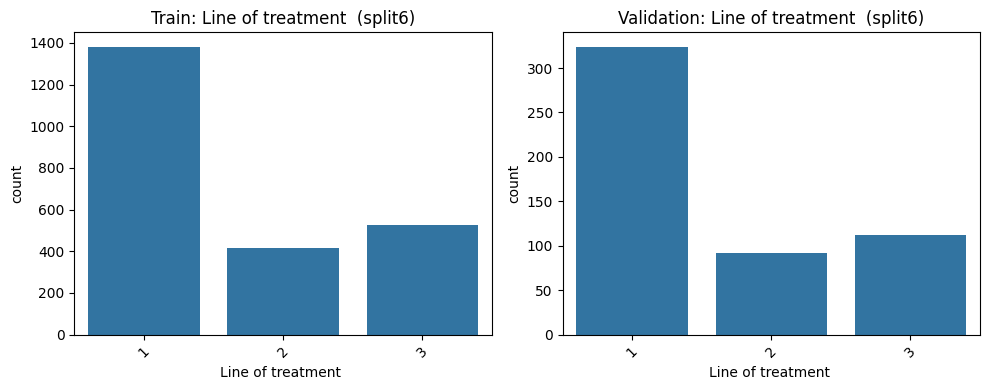


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.692771
10    0.307229
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.704545
10    0.295455
Name: proportion, dtype: float64


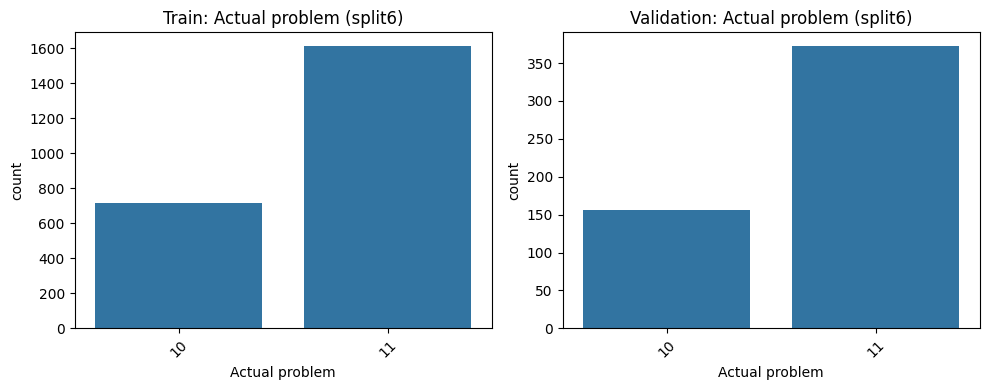



=== Covariate distributions for split7 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.617672
F    0.382328
Name: proportion, dtype: float64

Validation distribution:
Sexe
F    0.51004
H    0.48996
Name: proportion, dtype: float64


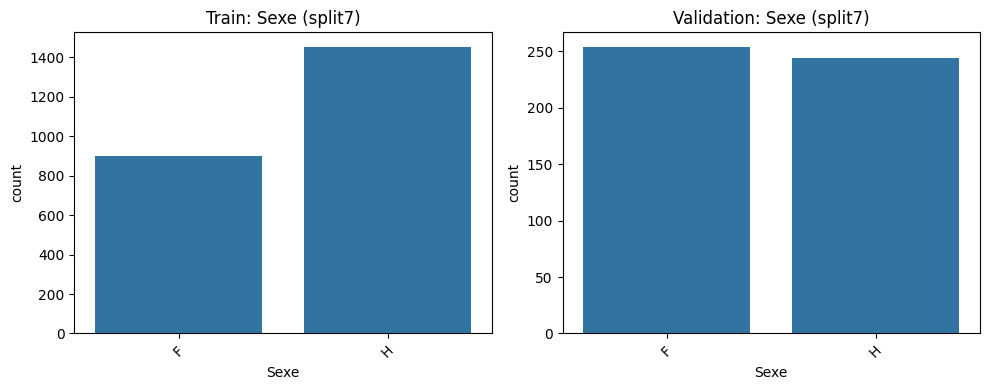


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.586236
3    0.233645
2    0.180119
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.654618
3    0.176707
2    0.168675
Name: proportion, dtype: float64


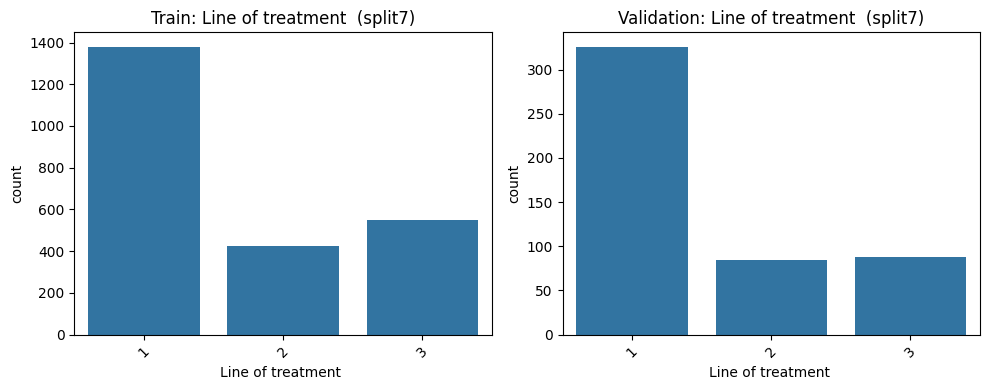


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.691589
10    0.308411
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.710843
10    0.289157
Name: proportion, dtype: float64


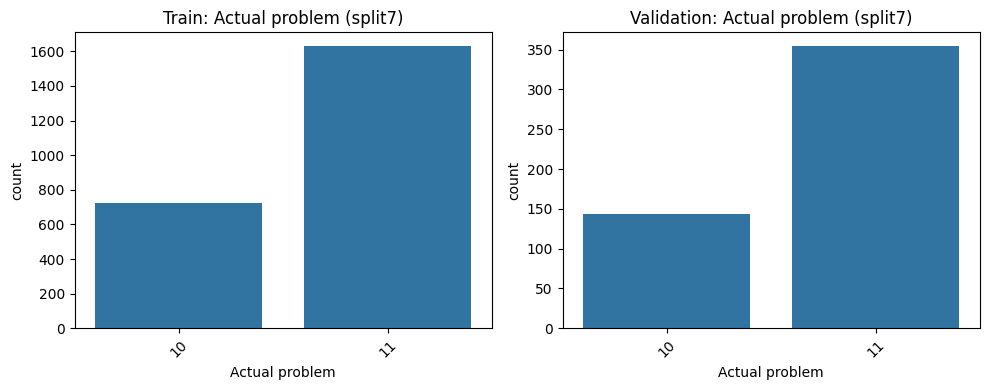



=== Covariate distributions for split8 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.603033
F    0.396967
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.567213
F    0.432787
Name: proportion, dtype: float64


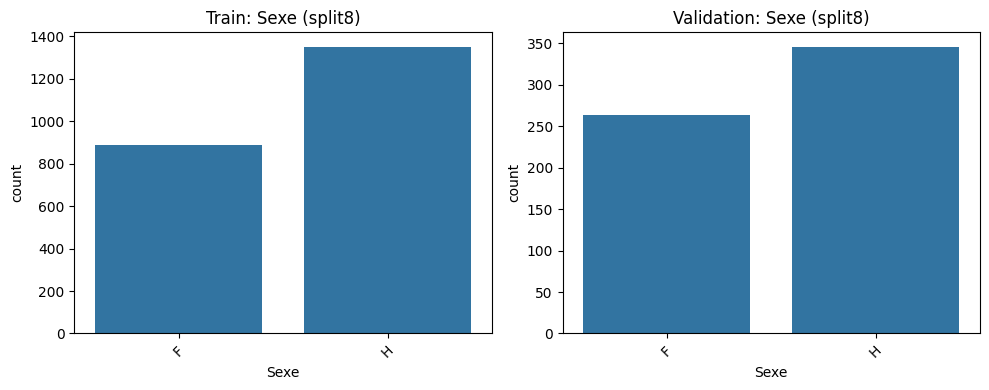


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.584300
3    0.225691
2    0.190009
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.649180
3    0.216393
2    0.134426
Name: proportion, dtype: float64


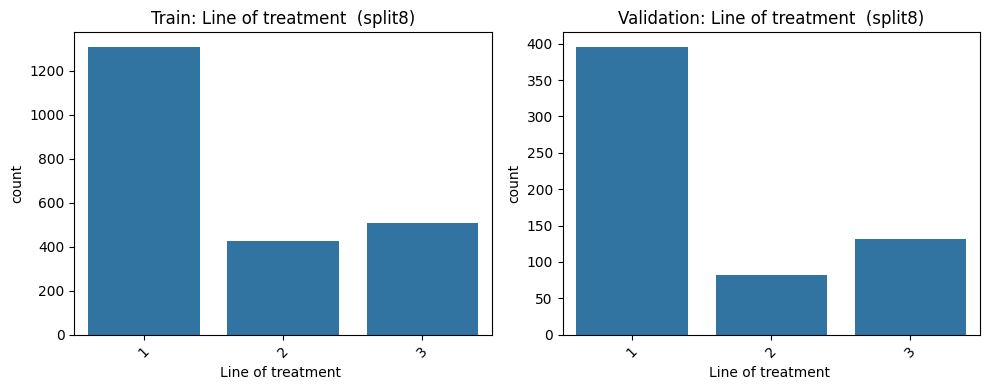


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.707404
10    0.292596
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.64918
10    0.35082
Name: proportion, dtype: float64


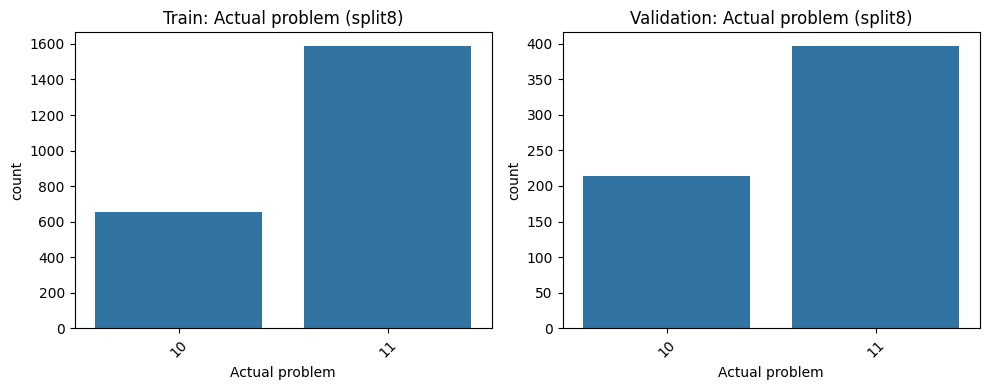



=== Covariate distributions for split9 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.595619
F    0.404381
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.594142
F    0.405858
Name: proportion, dtype: float64


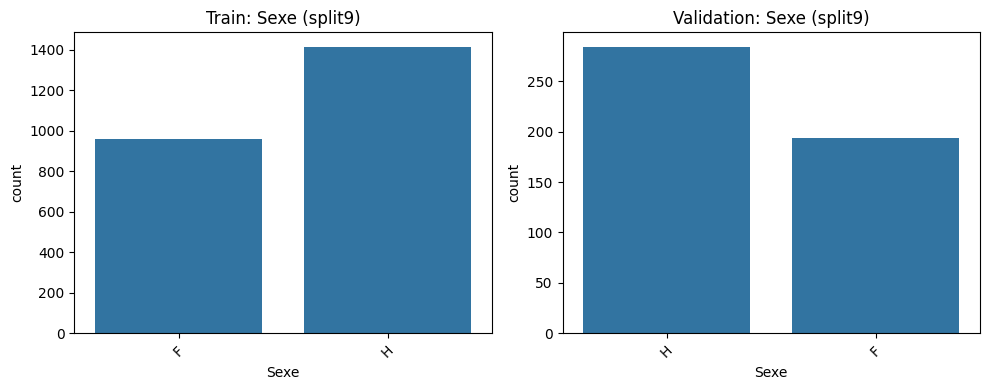


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.603201
3    0.219882
2    0.176917
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.573222
3    0.242678
2    0.184100
Name: proportion, dtype: float64


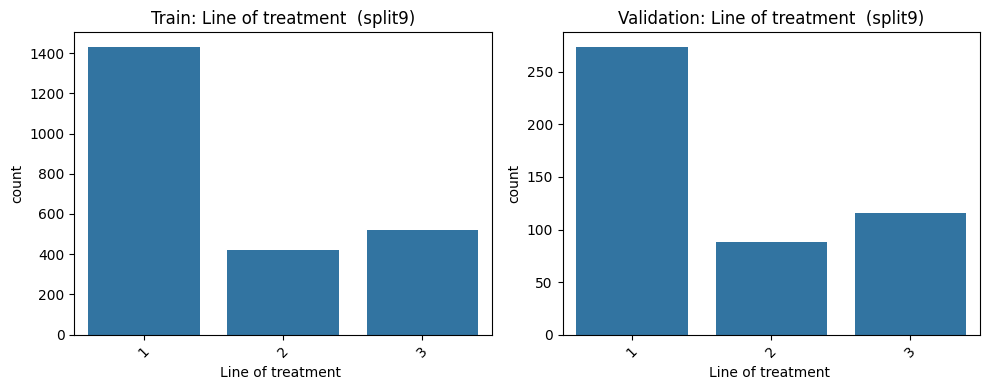


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.679865
10    0.320135
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.769874
10    0.230126
Name: proportion, dtype: float64


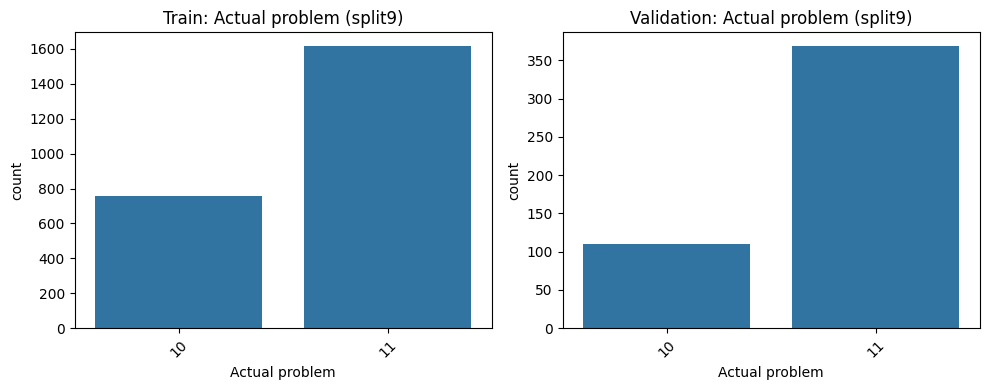



=== Covariate distributions for split10 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.592241
F    0.407759
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.609023
F    0.390977
Name: proportion, dtype: float64


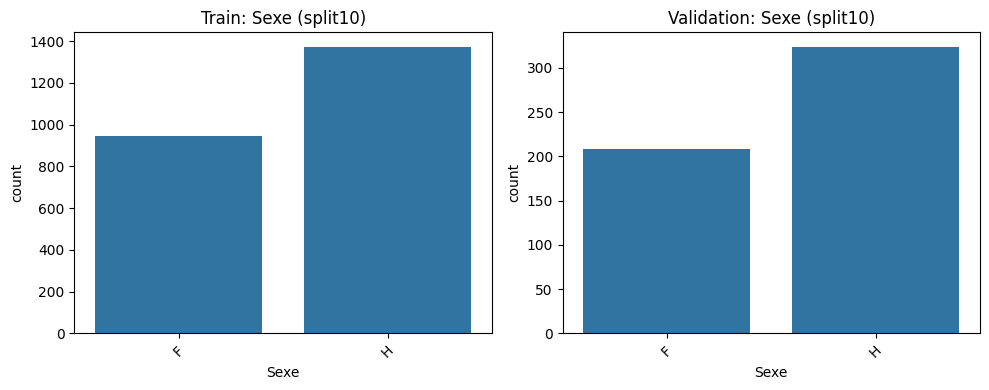


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.586207
3    0.230172
2    0.183621
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.650376
3    0.195489
2    0.154135
Name: proportion, dtype: float64


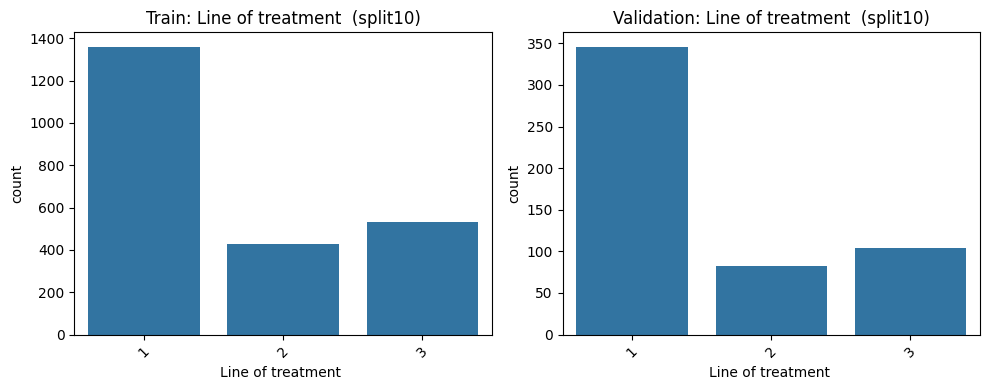


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.687069
10    0.312931
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.729323
10    0.270677
Name: proportion, dtype: float64


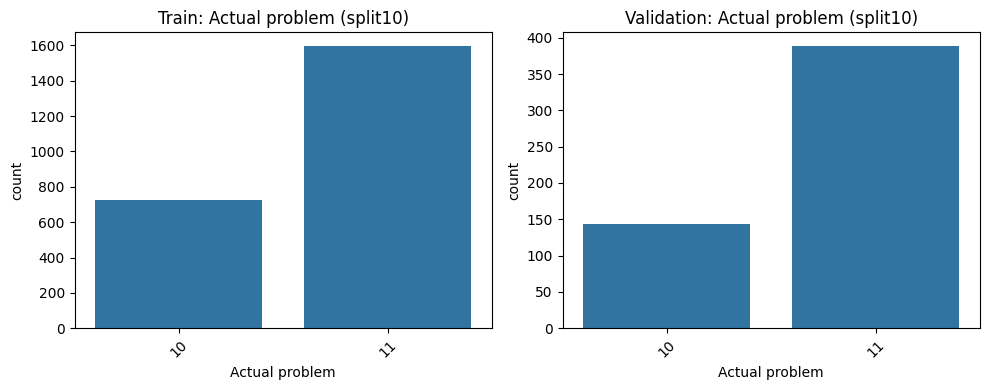



=== Covariate distributions for split11 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.600179
F    0.399821
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.577922
F    0.422078
Name: proportion, dtype: float64


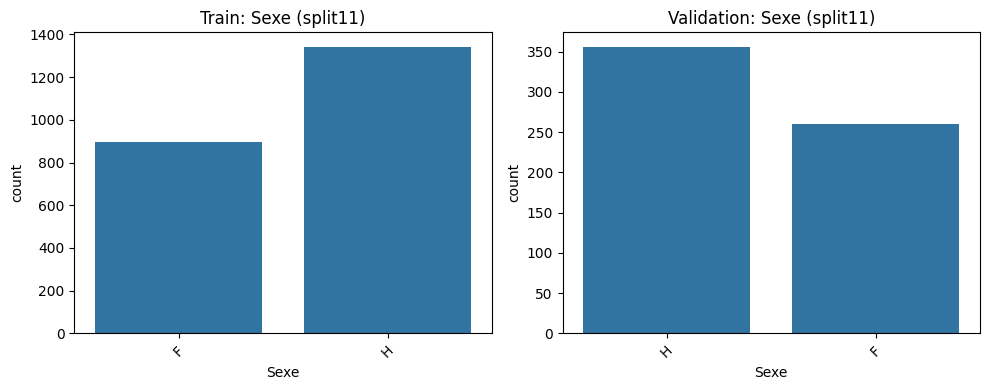


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.596601
3    0.221825
2    0.181574
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.603896
3    0.230519
2    0.165584
Name: proportion, dtype: float64


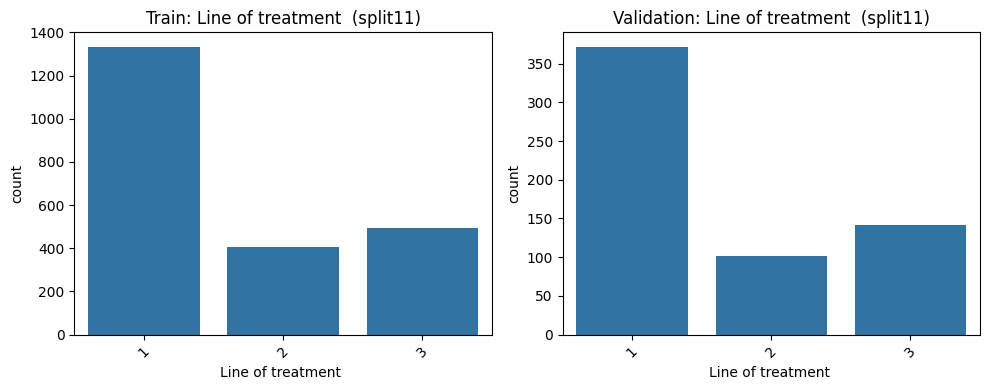


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.711091
10    0.288909
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.636364
10    0.363636
Name: proportion, dtype: float64


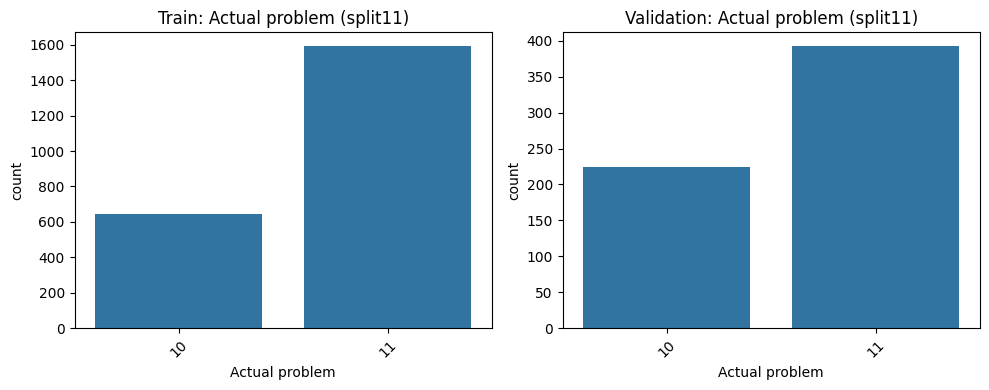



=== Covariate distributions for split12 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.606529
F    0.393471
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.545802
F    0.454198
Name: proportion, dtype: float64


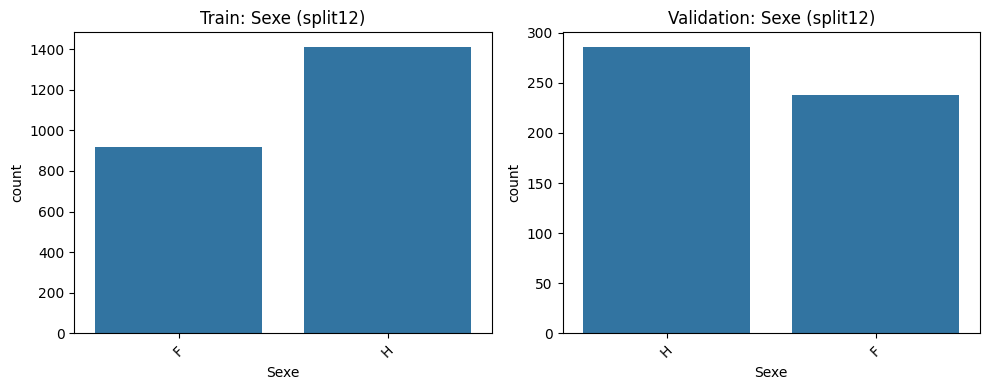


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.598797
3    0.225086
2    0.176117
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.595420
3    0.217557
2    0.187023
Name: proportion, dtype: float64


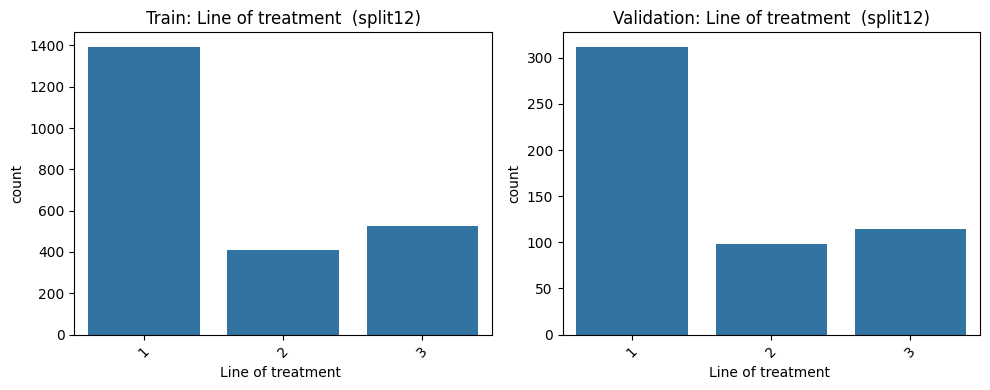


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.694158
10    0.305842
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.698473
10    0.301527
Name: proportion, dtype: float64


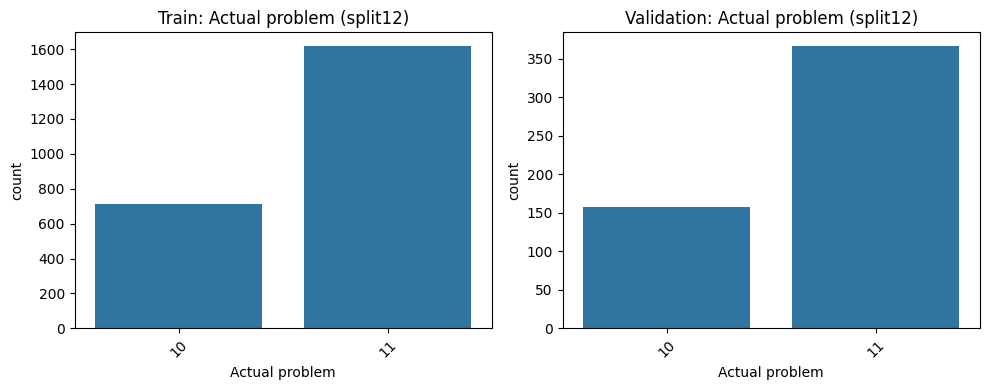



=== Covariate distributions for split13 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.594356
F    0.405644
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.599315
F    0.400685
Name: proportion, dtype: float64


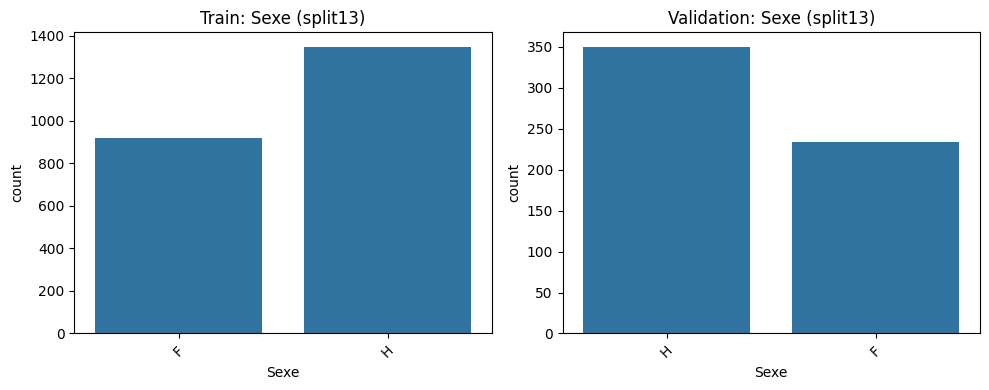


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.614638
3    0.208113
2    0.177249
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.534247
3    0.284247
2    0.181507
Name: proportion, dtype: float64


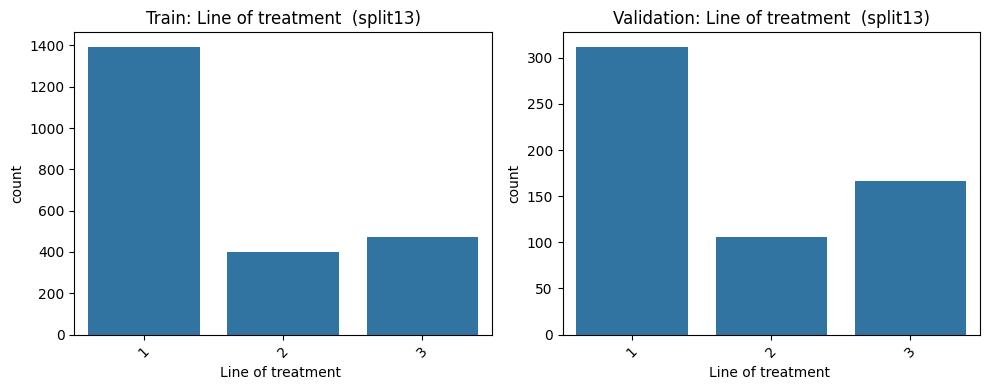


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.685185
10    0.314815
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.732877
10    0.267123
Name: proportion, dtype: float64


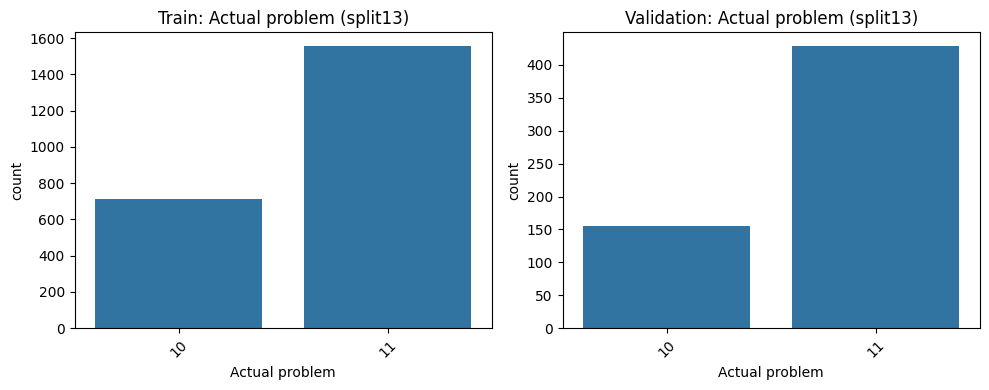



=== Covariate distributions for split14 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.575889
F    0.424111
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.677656
F    0.322344
Name: proportion, dtype: float64


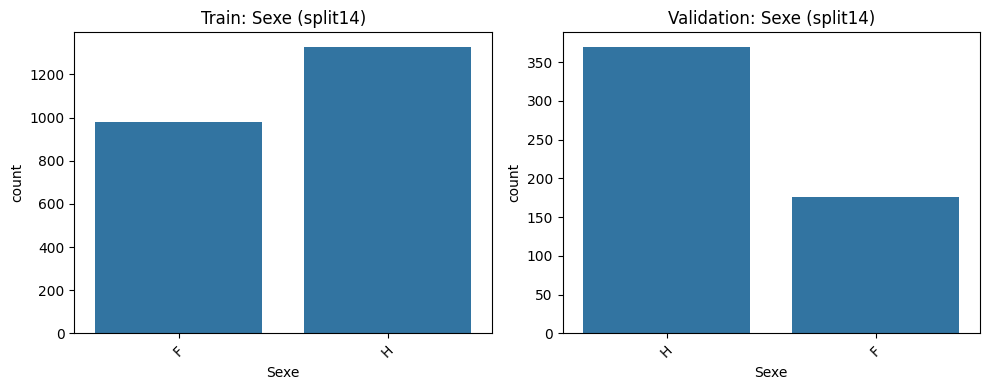


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.581960
3    0.232437
2    0.185603
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.666667
3    0.186813
2    0.146520
Name: proportion, dtype: float64


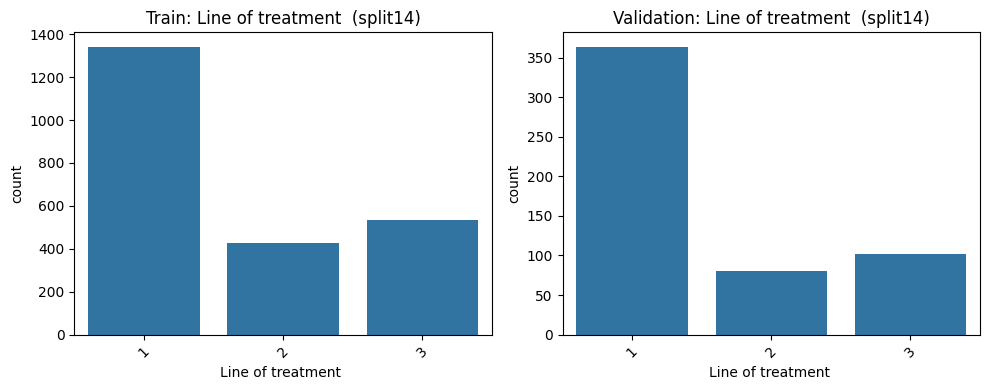


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.69124
10    0.30876
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.710623
10    0.289377
Name: proportion, dtype: float64


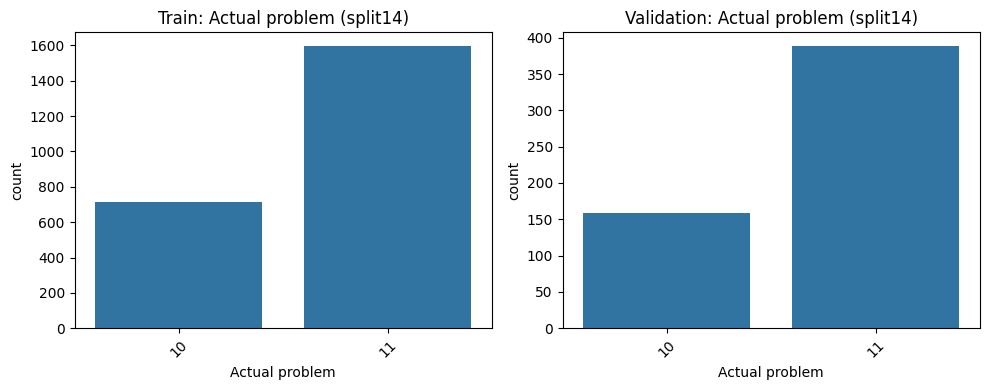



=== Covariate distributions for split15 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.611888
F    0.388112
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.528369
F    0.471631
Name: proportion, dtype: float64


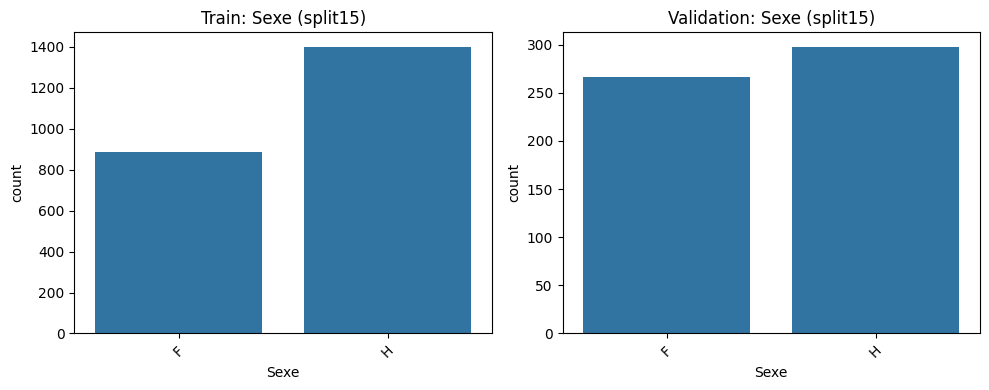


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.593531
3    0.224650
2    0.181818
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.617021
3    0.219858
2    0.163121
Name: proportion, dtype: float64


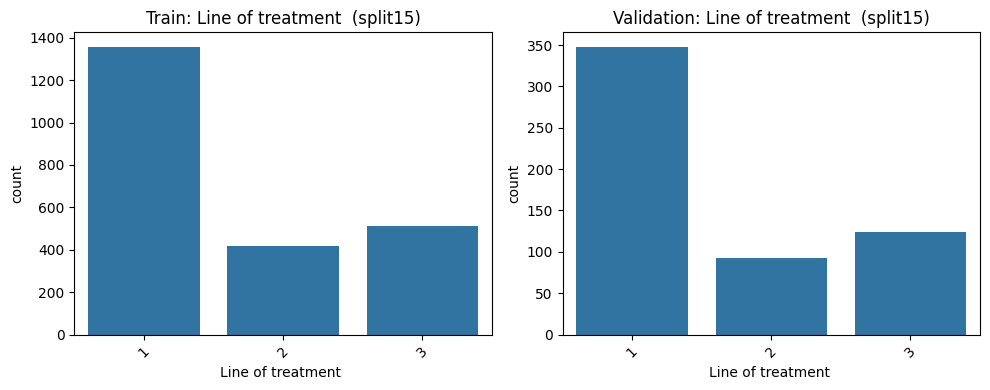


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.713287
10    0.286713
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.620567
10    0.379433
Name: proportion, dtype: float64


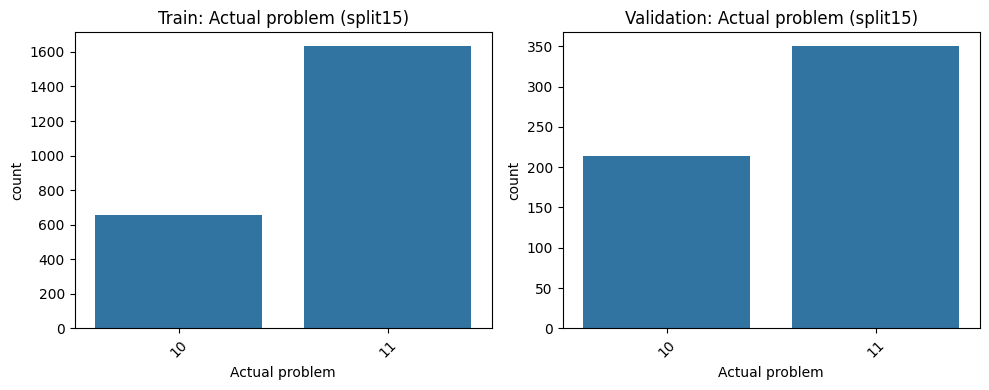



=== Covariate distributions for split16 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.578851
F    0.421149
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.650456
F    0.349544
Name: proportion, dtype: float64


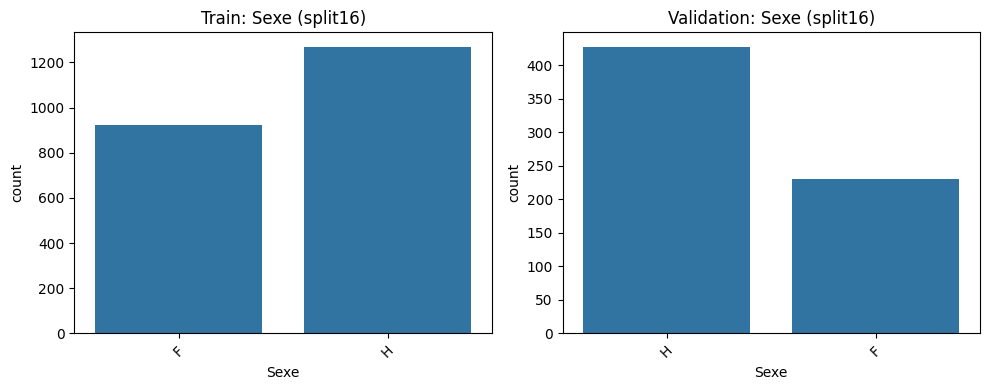


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.610757
3    0.204193
2    0.185050
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.556231
3    0.288754
2    0.155015
Name: proportion, dtype: float64


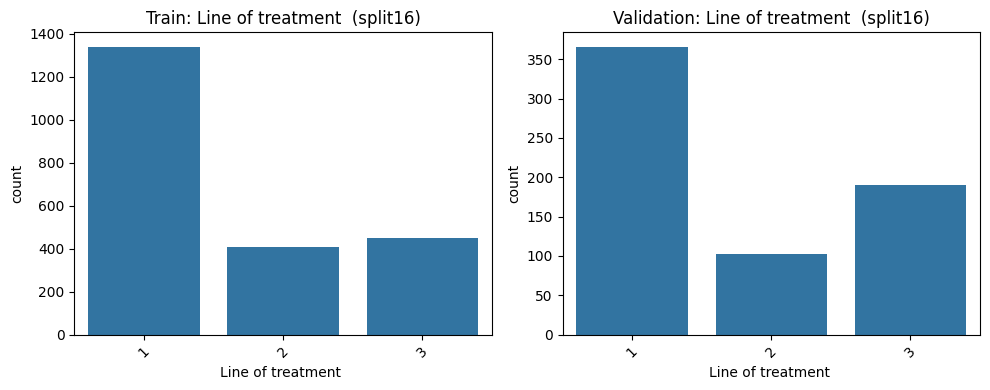


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.714676
10    0.285324
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.629179
10    0.370821
Name: proportion, dtype: float64


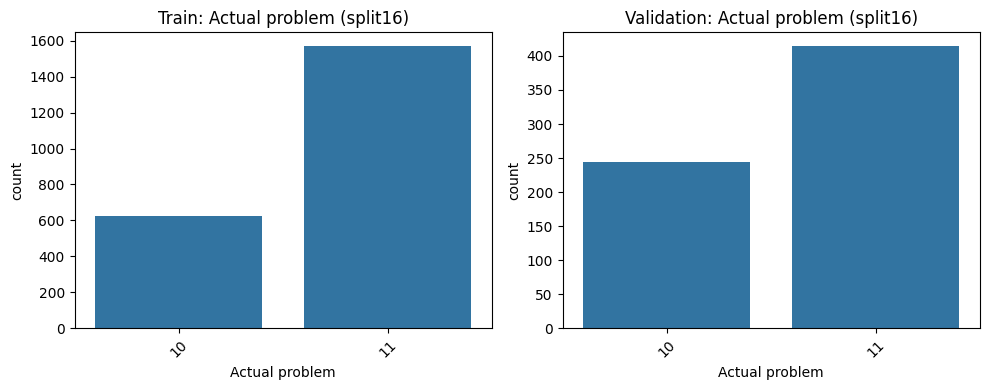



=== Covariate distributions for split17 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.59115
F    0.40885
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.611486
F    0.388514
Name: proportion, dtype: float64


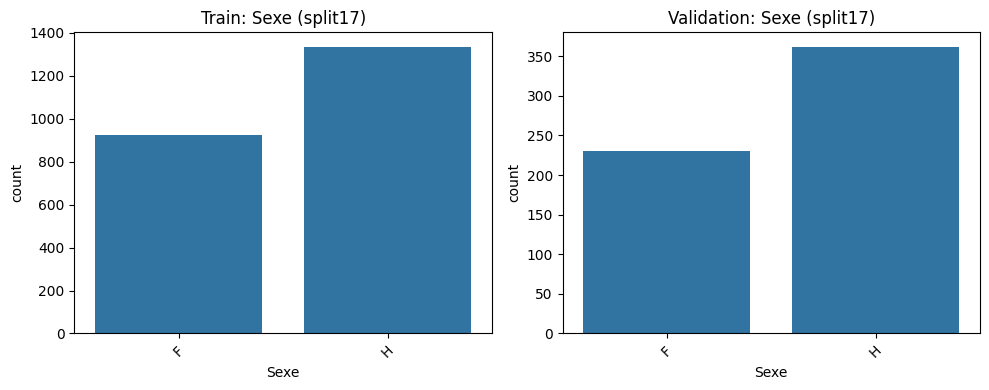


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.591150
3    0.238053
2    0.170796
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.625000
2    0.206081
3    0.168919
Name: proportion, dtype: float64


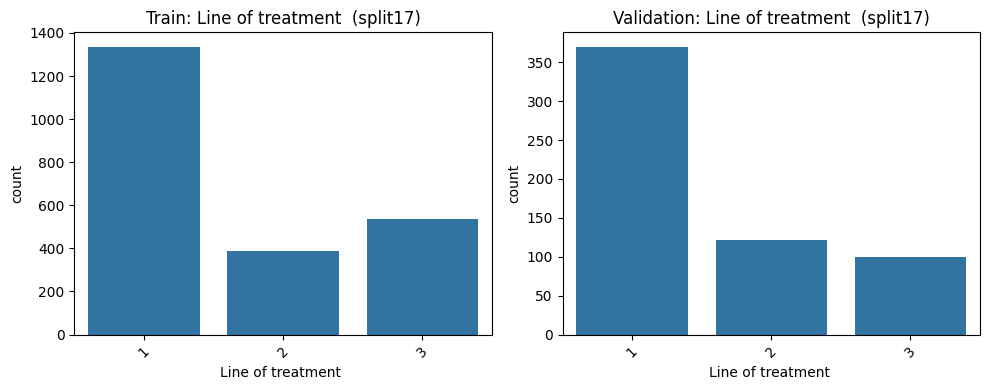


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.684071
10    0.315929
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.736486
10    0.263514
Name: proportion, dtype: float64


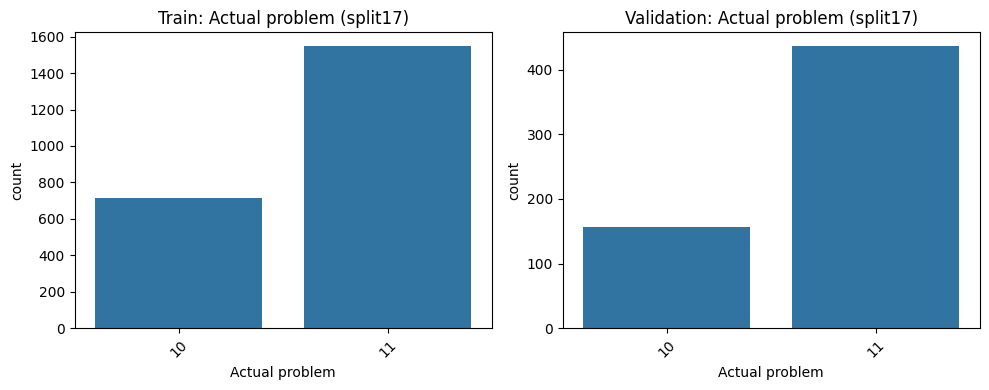



=== Covariate distributions for split18 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.595196
F    0.404804
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.596026
F    0.403974
Name: proportion, dtype: float64


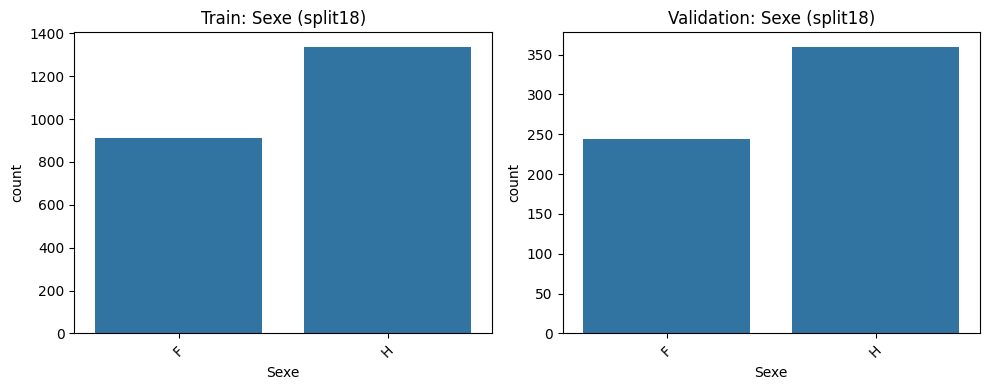


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.597865
3    0.221530
2    0.180605
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.599338
3    0.231788
2    0.168874
Name: proportion, dtype: float64


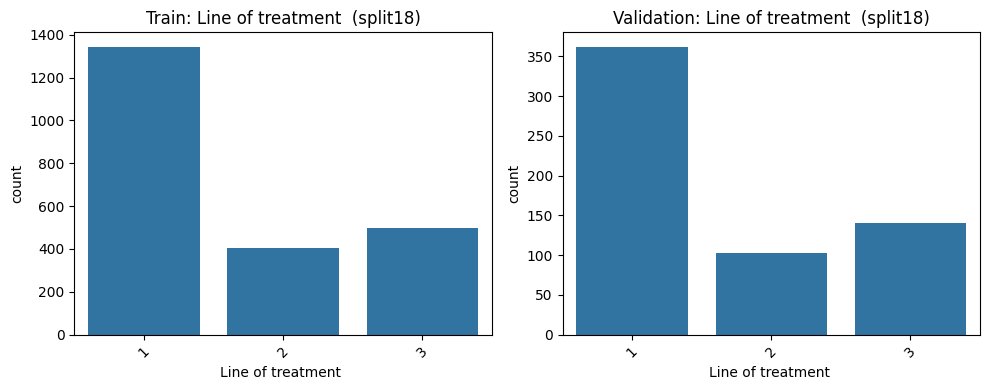


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.699288
10    0.300712
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.678808
10    0.321192
Name: proportion, dtype: float64


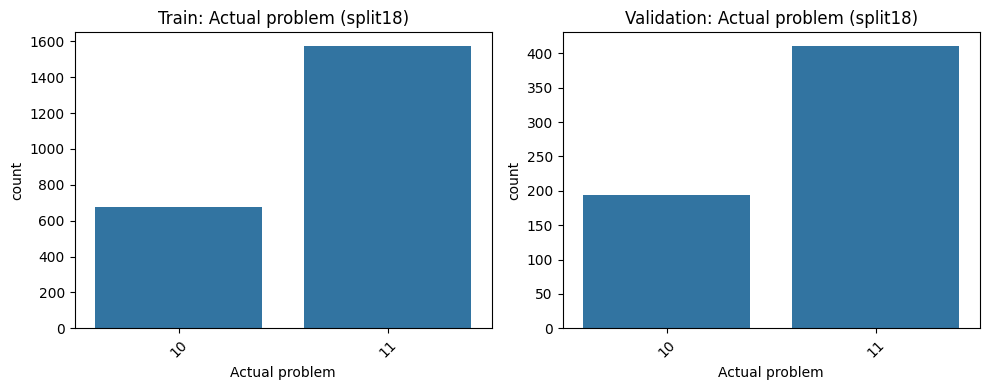



=== Covariate distributions for split19 ===

--- Distribution for Sexe ---
Train distribution:
Sexe
H    0.607394
F    0.392606
Name: proportion, dtype: float64

Validation distribution:
Sexe
H    0.548276
F    0.451724
Name: proportion, dtype: float64


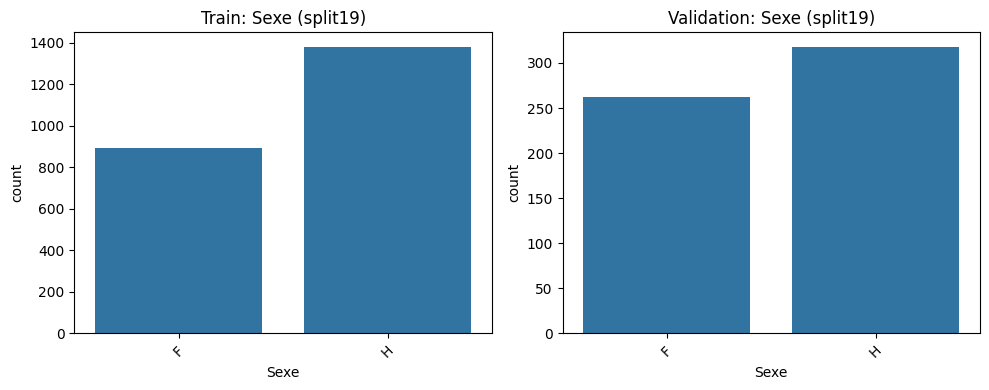


--- Distribution for Line of treatment  ---
Train distribution:
Line of treatment 
1    0.619718
3    0.215669
2    0.164613
Name: proportion, dtype: float64

Validation distribution:
Line of treatment 
1    0.513793
3    0.255172
2    0.231034
Name: proportion, dtype: float64


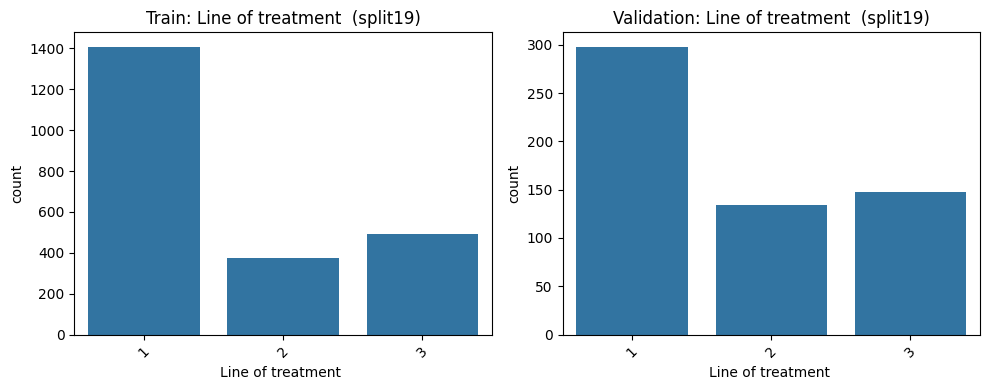


--- Distribution for Actual problem ---
Train distribution:
Actual problem
11    0.691021
10    0.308979
Name: proportion, dtype: float64

Validation distribution:
Actual problem
11    0.710345
10    0.289655
Name: proportion, dtype: float64


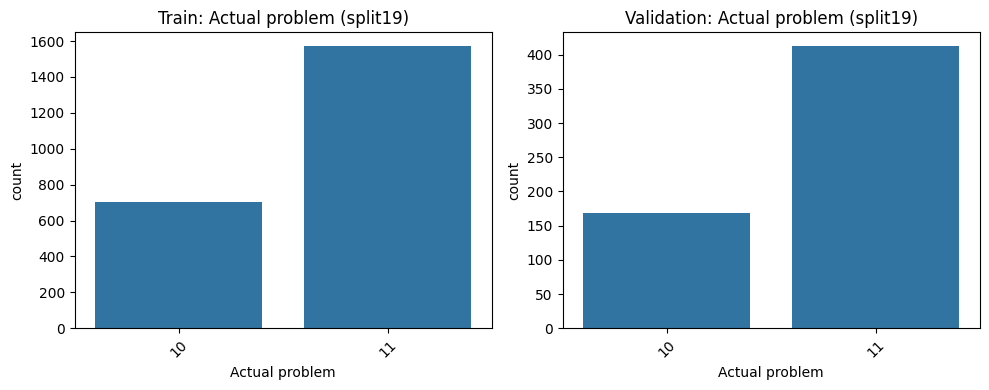

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data.csv file containing the scan information and bootstrap splits
df_csv = pd.read_csv("/home/mezher/Documents/Deauville_DeepLearning/splitting/data.csv")

# Load the mapping Excel file that contains additional covariates
mapping_excel_path = r"/home/mezher/Documents/Deauville_DeepLearning/splitting/1. DeepDeauville Excel complété et anonymisé.xlsx"
df_mapping = pd.read_excel(mapping_excel_path)

# Merge the two DataFrames on the study identifier. 
# In df_csv, the column is 'study_id'; in the Excel file, it might be 'SubjectCode'.
df_merged = pd.merge(df_csv, df_mapping, left_on="study_id", right_on="SubjectCode", how="left")

# Now, choose the covariate columns you want to investigate.
# (For example, "Sexe", "Line of treatment ", and "Actual problem")
covariate_columns = ["Sexe", "Line of treatment ", "Actual problem"]

# Define your bootstrap split columns (e.g. "split0", "split1", ..., "split19")
split_columns = [f"split{i}" for i in range(20)]

# Loop over each bootstrap split and compare the distributions between train and validation splits
for split_col in split_columns:
    print(f"=== Covariate distributions for {split_col} ===")
    
    # Filter the merged DataFrame for train and validation based on the current bootstrap split
    train_split = df_merged[df_merged[split_col] == 'train']
    val_split = df_merged[df_merged[split_col] == 'val']
    
    for cov in covariate_columns:
        print(f"\n--- Distribution for {cov} ---")
        print("Train distribution:")
        print(train_split[cov].value_counts(normalize=True))
        print("\nValidation distribution:")
        print(val_split[cov].value_counts(normalize=True))
        
        # Optional: visualize side-by-side
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.countplot(x=cov, data=train_split)
        plt.title(f"Train: {cov} ({split_col})")
        plt.xticks(rotation=45)
        
        plt.subplot(1, 2, 2)
        sns.countplot(x=cov, data=val_split)
        plt.title(f"Validation: {cov} ({split_col})")
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    print("\n" + "="*50 + "\n")
